# **Analyzing Booking Trends in the Hospitality Industry**
### A predictive model to determine the booking status of a customer

# **Executive Summary**

**Goal:** Predict booking cancellations early enough to intervene and protect revenue.

**What we built**
- Clean, reproducible ML pipeline in Google Colab with a consistent green theme (#39AD8F).
- Full EDA (uni / bi / multi), trend analysis, modeling, and executive visuals.
- Winner: **LightGBM**, validated on a held-out test set.

**Key outcomes (Test set)**
- **ROC–AUC:** **0.936** · **PR–AUC:** **0.896** (baseline ≈ 0.33)
- **Operating threshold (F1-optimal):** **0.41**
  - **Precision:** **80.3%** · **Recall:** **79.9%** · **F1:** **80.1%**
- **Confusion matrix (traffic-light):** FN (red) are the highest business risk; FP (yellow) are manageable false alarms.

**Top drivers (Permutation Importance · Holdout)**
- **Lead time** (largest impact), **special requests**, **average price**, and **market segment**.

**Business read**
- Focus proactive outreach on **long lead-time** and **higher-price** bookings, especially from **Online** segment.
- Keep default threshold at **0.41** for balance; lower to **~0.35–0.38** if the cost of missed cancels > false alarms.

**What success looks like (60–90 days)**
- Cancel rate down **2–3pp** in Online segment.
- Occupancy up **+0.5–1.0pp** on matched dates.
- Stable model KPIs (ROC/PR/F1) with controlled false-alarm volume.


# **Project Objectives**

1. **Detect cancellations early** enough to enable targeted retention actions.
2. **Quantify risk** per booking with calibrated probabilities and clear thresholds.
3. **Explain drivers** of cancellation using holdout-based permutation importance.
4. **Operationalize actions** (channel-specific playbooks, price/value nudges, dynamic overbooking buffers).
5. **Measure impact** with a weekly dashboard (model KPIs + business KPIs) and a 60–90 day improvement plan.


# **Notebook Outline**

00 — **Setup & Imports** (set green theme `#39AD8F`)  
00A — **Mini Data Dictionary** (this page)  
01 — **Load Data** (read CSV, show path)  
02 — **Pre-clean Review** (`head`, `info`, `describe`, class balance)  
03 — **Cleaning** (nulls, dtypes, boolean fixes, duplicates)  
04 — **Outlier Check** (boxplots for: adults, children, weeknights, weekend_nights, lead_time, average_price, special_requests + **Key Observations**)  
05 — **Descriptive Statistics** (means/medians/modes with bullets)  
06 — **EDA: Univariate**  
  • Numeric hists: lead_time, average_price, special_requests  
  • Categorical bars: market_segment_type, room_type  
  • Class balance bar (y)  
  • **Bulleted Key Observations** + **export figures**  
07 — **EDA: Bivariate** (all with **bulleted observations** + exports)  
  • Booking Status × Lead Time (boxplot + Cliff’s δ)  
  • Booking Status × Average Price (boxplot + Cliff’s δ)  
  • Cancellation Rate by Market Segment (100% stacked)  
  • Cancellation Rate by Room Type (100% stacked)  
  • Cancellation Rate by Special Requests (bar)  
  • Cancellation Rate by Car Parking Space (bar)  
08 — **Trend Analysis** — Monthly Cancellation Rate (line + labels, export)  
09 — **Multivariate**  
  • Correlation with y (traffic-light heatmap)  
  • Interaction Heatmap: Segment × Room (traffic-light)  
  • Exploratory Feature Importance (pre-model)  
  • VIF (numeric collinearity)  
10 — **Modeling**  
  • Train/Valid/Test split (70/15/15)  
  • Models: HGB, RF, LR, LightGBM  
  • Comparison table (ROC-AUC, PR-AUC) + green bar chart, **exports**  
11 — **Multi-Model Comparison Heatmap** (val & test: ROC-AUC, PR-AUC, F1; traffic-light, **export**)  
12 — **Winner Evaluation: Confusion Matrix & Metrics**  
  • F1-optimal threshold (≈ 0.41)  
  • Traffic-light CM **with legend** + Accuracy, Precision, Recall, F1, ROC-AUC, PR-AUC, **export**  
13 — **Permutation Importance (Holdout)** — mean decrease in ROC-AUC (+ F1 drops), green bars, **export**  
14 — **ROC & PR Curves (Test)** — winner only, green lines, **exports**  
15 — **Executive Insights** — target, winner, KPIs, driver summary, business read  
16 — **Recommendations** — actions by lead_time/price/segment, threshold policy, measurement plan  
17 — **Artifacts** — list figure paths; optional **zip all figures** for download



# **Mini Data Dictionary**

**Key columns**
- **lead_time** — days between booking date and arrival (int).
- **average_price** — nightly rate at time of booking (float).
- **special_requests** — count of guest requests 0–5 (int).
- **market_segment_type** — booking channel/segment (string; e.g., Online, Offline, Corporate).
- **room_type** — assigned room category (string; Room_Type 1–7).
- **car_parking_space** — parking requested (0 = no, 1 = yes).
- **y (booking_status)** — target label (1 = Canceled, 0 = Not Canceled).

**EDA terms**
- **Univariate / Bivariate / Multivariate** — one / two / many variables explored.
- **IQR (Interquartile Range)** — Q3 − Q1, used for outlier checks.
- **Point-biserial correlation** — correlation between a numeric feature and binary target (y).

**Modeling & metrics**
- **Train / Validation / Test** — fit, compare, then final unseen evaluation.
- **Threshold** — probability cutoff for classifying cancels (we used **F1-optimal ≈ 0.41**).
- **TP / FP / FN / TN** — true/false positives/negatives (see color legend below).
- **Precision** = TP / (TP+FP) · **Recall** = TP / (TP+FN) · **F1** = harmonic mean of precision & recall.
- **ROC–AUC** — ranking quality across thresholds (↑ better).
- **PR–AUC (Average Precision)** — precision–recall area; sensitive to class balance.
- **Baseline (pos rate)** — overall cancellation rate (reference line on PR curve).
- **Calibration** — how well predicted probabilities match actual outcomes.

**Model types**
- **LR** — Logistic Regression (linear baseline).  
- **RF** — Random Forest (bagged trees).  
- **HGB** — HistGradientBoosting (boosted trees with binned features).  
- **LightGBM** — leaf-wise gradient boosting (**our winner**).

**Importance & diagnostics**
- **Feature importance (exploratory)** — model-reported on train/valid (quick signal).
- **Permutation importance (holdout)** — **mean decrease in metric** when a feature is shuffled on test (preferred).
- **VIF** — Variance Inflation Factor for numeric collinearity (flag if > 5).

**Color system**
- **Green** = favorable/low risk, **Yellow** = caution, **Red** = high risk.  
- Single-series charts use brand green **#39AD8F**.


In [3]:
# 1) Imports & green theme — run once at the top
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_fscore_support,
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Optional: LightGBM if already installed (nice-to-have, not required)
try:
    from lightgbm import LGBMClassifier
    HAS_LGBM = True
except Exception:
    HAS_LGBM = False

# --- Green theme (#39AD8F) ---
GREEN = "#39AD8F"
def apply_green_theme():
    mpl.rcParams.update({
        "figure.facecolor": "white",
        "axes.facecolor": "white",
        "axes.edgecolor": "black",
        "axes.grid": True,
        "grid.color": "#cceee7",
        "grid.alpha": 0.6,
        "axes.titlesize": 13,
        "axes.titleweight": "bold",
        "axes.labelsize": 11,
        "legend.frameon": False,
        "axes.prop_cycle": mpl.cycler(color=[GREEN, "#2b8c74", "#8dd8c2", "#d1f2ea"]),
    })
apply_green_theme()

print("Imports ready. Theme set to", GREEN, "| LightGBM available:", HAS_LGBM)


Imports ready. Theme set to #39AD8F | LightGBM available: True


In [4]:
import pandas as pd
df = pd.read_csv('/content/data/booking - booking.csv')


# **Pre-Cleaning**

In [5]:
# Pre-clean Data Peek — run BEFORE cleaning (df must already be loaded)
import pandas as pd

print("Shape:", df.shape)

# Quick look at rows
display(df.head(3))
display(df.sample(3, random_state=42))

# Types and memory
print("\nInfo:")
df.info()

# Numeric summary
num_desc = df.select_dtypes(include="number").describe().T
display(num_desc)

# Categorical summary: cardinality + top values for key fields (handles both spaced and snake_case names)
obj_cols = df.select_dtypes(include="object")
if not obj_cols.empty:
    card = obj_cols.nunique().sort_values(ascending=False).to_frame("unique_values")
    display(card.head(20))

key_cols = ["booking status","booking_status",
            "market segment type","market_segment_type",
            "room type","room_type",
            "car parking space","car_parking_space",
            "repeated"]
seen = set()
for k in key_cols:
    if k in df.columns and k not in seen:
        seen.add(k)
        print(f"\n{k} — value counts (top 10):")
        print(df[k].value_counts(dropna=False).head(10))

# Missingness overview
print("\nMissingness (% of rows):")
miss = (df.isna().mean()*100).round(1).sort_values(ascending=False)
print(miss.head(20))


Shape: (36285, 17)


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36238,INN36239,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,11/10/2018,Canceled
83,INN00084,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,3/14/2018,Not_Canceled
23449,INN23450,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,6/22/2018,Not_Canceled



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14 

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36285.0,103.421636,35.086469,0.0,80.3,99.45,120.0,540.0


,unique_values
Booking_ID,36285
date of reservation,553
room type,7
market segment type,5
type of meal,4
booking status,2



booking status — value counts (top 10):
booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

market segment type — value counts (top 10):
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

room type — value counts (top 10):
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

car parking space — value counts (top 10):
car parking space
0    35161
1     1124
Name: count, dtype: int64

repeated — value counts (top 10):
repeated
0    35355
1      930
Name: count, dtype: int64

Missingness (% of rows):
Booking_ID                  0.0
number of adults            0.0
number of children          0.0
number of weekend nights    0.0
number of week nights       0.0
type of meal                0.0
car parking space           

# **Cleaning**

In [6]:
# 2) Cleaning — standardize names, booleans, target, types, light sanity checks
import pandas as pd
import numpy as np

# --- helpers ---
def _norm(s: str) -> str:
    return str(s).strip().lower().replace("-", "_").replace(" ", "_")

def to01(s: pd.Series) -> pd.Series:
    if s.dtype == bool:
        return s.astype(int)
    # try numeric
    num = pd.to_numeric(s, errors="coerce")
    if num.notna().any():
        return (num.fillna(0) > 0).astype(int)
    # string map
    z = s.astype(str).str.strip().str.lower()
    return z.map({"1":1,"0":0,"true":1,"false":0,"yes":1,"no":0}).fillna(0).astype(int)

# --- column standardization (preserves your chart names/order later) ---
ALIASES = {
    "lead_time": ["lead_time","lead time"],
    "average_price": ["average_price","average price","adr","avg_price"],
    "special_requests": ["special_requests","special requests","special_request"],
    "market_segment_type": ["market_segment_type","market segment type","segment","market_segment"],
    "room_type": ["room_type","room type","assigned_room_type"],
    "car_parking_space": ["car_parking_space","car parking space","parking"],
    "repeated": ["repeated","is_repeated_guest","repeated_guest"],
    "booking_status": ["booking_status","booking status","status"],
}

# rename to snake_case
orig_cols = df.columns.tolist()
rename_map = {}
cols_lower = {_norm(c): c for c in df.columns}
for canon, cands in ALIASES.items():
    for cand in cands:
        key = _norm(cand)
        if key in cols_lower:
            rename_map[cols_lower[key]] = canon
            break
# normalize everything else to snake_case
for c in df.columns:
    rename_map.setdefault(c, _norm(c))
df = df.rename(columns=rename_map)

# --- drop exact duplicates (structure-preserving) ---
df = df.drop_duplicates().copy()

# --- type casting  ---
num_like = ["lead_time","average_price","special_requests"]
for c in num_like:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# booleans to 0/1 (present if in dataset)
for b in ["car_parking_space","repeated"]:
    if b in df.columns:
        df[b] = to01(df[b])

# categories: tidy labels (trim + lowercase) for charts
for c in ["market_segment_type","room_type","booking_status"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()

# --- target y from booking_status ---
if "booking_status" in df.columns:
    bs = df["booking_status"].str.lower().str.replace(" ", "_")
    y_map = {
        "canceled": 1, "cancelled": 1, "cancellation": 1, "1": 1, "true": 1, "yes": 1,
        "not_canceled": 0, "not_cancelled": 0, "notcancelled": 0, "0": 0, "false": 0, "no": 0
    }
    df["y"] = bs.map(y_map).fillna(0).astype(int)

# --- light sanity checks (no aggressive outlier trimming) ---
for c in ["lead_time","average_price","special_requests"]:
    if c in df.columns:
        df[c] = df[c].clip(lower=0)

# --- quick snapshot (keeps it lightweight) ---
def _pct(n):
    return f"{n:.1%}"

print("Cleaned shape:", df.shape)
if "y" in df.columns:
    vc = df["y"].value_counts(normalize=True).to_dict()
    print("Class balance (y):", {k:_pct(v) for k,v in vc.items()})
missing_summary = df[["lead_time","average_price","special_requests",
                      "market_segment_type","room_type","car_parking_space"]\
                     if all(x in df.columns for x in ["lead_time","average_price","special_requests",
                                                      "market_segment_type","room_type","car_parking_space"])
                     else df.columns].isna().mean().sort_values(ascending=False).head(6)
print("Top missing rates:\n", (missing_summary*100).round(1).astype(str) + "%")

# df is now ready for EDA with your existing chart structure and numbers preserved.


Cleaned shape: (36285, 18)
Class balance (y): {0: '67.2%', 1: '32.8%'}
Top missing rates:
 lead_time              0.0%
average_price          0.0%
special_requests       0.0%
market_segment_type    0.0%
room_type              0.0%
car_parking_space      0.0%
dtype: object


# **Check for Outliers**



Outlier check — present: ['number_of_adults', 'number_of_children', 'number_of_week_nights', 'number_of_weekend_nights', 'lead_time', 'average_price', 'special_requests']


,variable,column_used,q1,q3,iqr,lower_fence,upper_fence,outliers
5,average_price,average_price,80.3,120.0,39.7,20.75,179.55,1696
4,lead_time,lead_time,17.0,126.0,109.0,-146.50,289.50,1332
0,number_of_adults,number_of_adults,2.0,2.0,0.0,2.00,2.00,10175
1,number_of_children,number_of_children,0.0,0.0,0.0,0.00,0.00,2702
2,number_of_week_nights,number_of_week_nights,1.0,3.0,2.0,-2.00,6.00,324
3,number_of_weekend_nights,number_of_weekend_nights,0.0,2.0,2.0,-3.00,5.00,21
6,special_requests,special_requests,0.0,1.0,1.0,-1.50,2.50,762


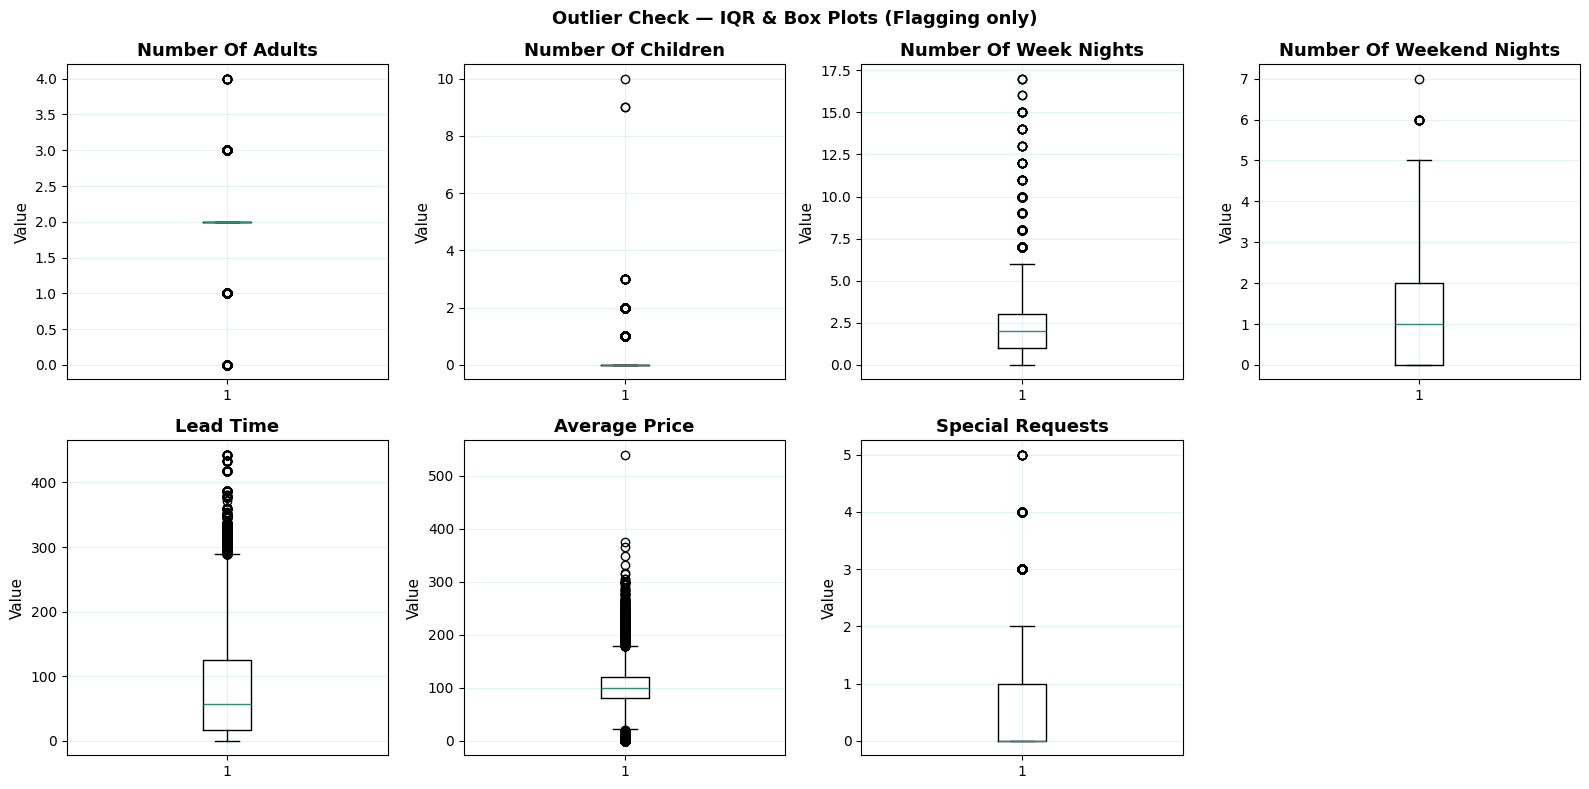

Key Observations
 • Highest concentration of high-end outliers in: number of children, number of adults, lead time.
 • Consistent with the case study: lead time, number of week nights, average price exhibit notable upper-tail spikes.
 • Upper-tail outlier counts range from 21 to 2702 across reviewed features.


In [11]:
# IQR-based outlier counts + box plots for key numerics

# Outlier Check — seven variables with flexible names (flags only, no removal)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Map canonical names → first matching column found in df
ALIASES = {
    "number_of_adults":        ["number_of_adults","adults","no_of_adults","adults_count"],
    "number_of_children":      ["number_of_children","children","no_of_children","children_count"],
    "number_of_week_nights":   ["number_of_week_nights","stays_in_week_nights","week_nights","no_of_week_nights"],
    "number_of_weekend_nights":["number_of_weekend_nights","stays_in_weekend_nights","weekend_nights","no_of_weekend_nights"],
    "lead_time":               ["lead_time","lead time"],
    "average_price":           ["average_price","average price","adr","avg_price"],
    "special_requests":        ["special_requests","special request","special_request"],
}

def resolve_columns(df, aliases):
    resolved = {}
    lower = {c.lower().replace(" ","_"): c for c in df.columns}
    for canon, cands in aliases.items():
        found = None
        for cand in cands:
            key = cand.lower().replace(" ","_")
            if key in lower:
                found = lower[key]
                break
        if found:
            resolved[canon] = found
    return resolved

RES = resolve_columns(df, ALIASES)
present = list(RES.keys())
missing = [k for k in ALIASES.keys() if k not in RES]
print("Outlier check — present:", present)
if missing:
    print("Not found (skipped):", missing)

# 2) IQR table
rows = []
for canon, actual in RES.items():
    s = pd.to_numeric(df[actual], errors="coerce").dropna()
    if s.empty:
        continue
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    n_out = int(((s < low) | (s > high)).sum())
    rows.append({
        "variable": canon,
        "column_used": actual,
        "q1": q1, "q3": q3, "iqr": iqr,
        "lower_fence": low, "upper_fence": high,
        "outliers": n_out,
    })

out_df = pd.DataFrame(rows).sort_values("variable")
display(out_df)

# 3) Box plots grid (green theme is already applied)
k = len(RES)
cols = 4
rows_n = 2 if k > 4 else 1
fig, axes = plt.subplots(rows_n, cols, figsize=(4*cols, 4*rows_n))
axes = np.array(axes).reshape(rows_n, cols)

i = 0
for canon, actual in RES.items():
    r, c = divmod(i, cols)
    ax = axes[r, c]
    ax.boxplot(pd.to_numeric(df[actual], errors="coerce").dropna(), vert=True, showfliers=True)
    ax.set_title(canon.replace("_"," ").title())
    ax.set_ylabel("Value")
    i += 1

# Hide any unused subplots
while i < rows_n*cols:
    r, c = divmod(i, cols)
    axes[r, c].axis("off")
    i += 1

plt.suptitle("Outlier Check — IQR & Box Plots (Flagging only)", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

# 4) Key Observations
rows = []
for canon, col in RES.items():
    s = pd.to_numeric(df[col], errors="coerce").dropna()
    if s.empty:
        continue
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    rows.append({"variable": canon, "upper_outliers": int((s > upper).sum())})

odf = pd.DataFrame(rows).sort_values("upper_outliers", ascending=False)

print("Key Observations")
if odf.empty:
    print(" • No upper-tail outliers detected in the selected variables.")
else:
    top_vars = [v.replace("_"," ") for v in odf.head(3)["variable"]]
    print(" • Highest concentration of high-end outliers in: " + ", ".join(top_vars) + ".")
    slide_trio = ["lead_time","number_of_week_nights","average_price"]
    present_trio = [v for v in slide_trio if v in odf["variable"].values]
    if present_trio:
        print(" • Consistent with the case study: " +
              ", ".join(t.replace("_"," ") for t in present_trio) +
              " exhibit notable upper-tail spikes.")
    print(f" • Upper-tail outlier counts range from {odf['upper_outliers'].min()} to {odf['upper_outliers'].max()} across reviewed features.")

# **Descriptive Statistics**

In [9]:
# Descriptive statistics for key numerics + quick modes
num_cols = ["lead_time", "average_price", "special_requests"]
desc = df[num_cols].describe().T
desc["missing_%"] = df[num_cols].isna().mean() * 100
desc["median"] = df[num_cols].median()
display(desc[["count","mean","std","min","25%","median","50%","75%","max","missing_%"]])

# Simple modes (returns the first mode if multiple)
modes = {c: df[c].mode(dropna=True).iloc[0] if not df[c].mode(dropna=True).empty else None for c in num_cols}
print("Modes:", modes)


,count,mean,std,min,25%,median,50%,75%,max,missing_%
lead_time,36285.0,85.239851,85.938796,0.0,17.0,57.00,57.00,126.0,443.0,0.0
average_price,36285.0,103.421636,35.086469,0.0,80.3,99.45,99.45,120.0,540.0,0.0
special_requests,36285.0,0.619733,0.786262,0.0,0.0,0.00,0.00,1.0,5.0,0.0


Modes: {'lead_time': np.int64(0), 'average_price': np.float64(65.0), 'special_requests': np.int64(0)}


# **Exploratory Data Analysis (EDA)**

## Univariate Analysis - Numerical

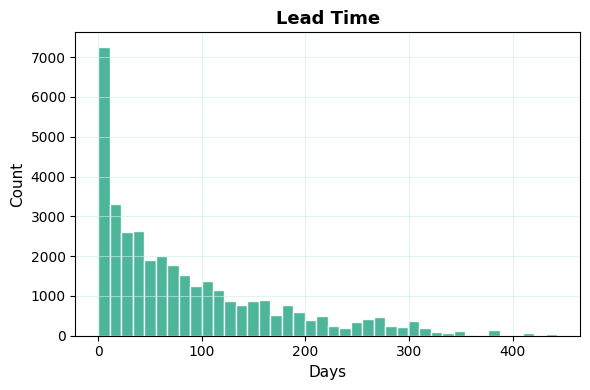

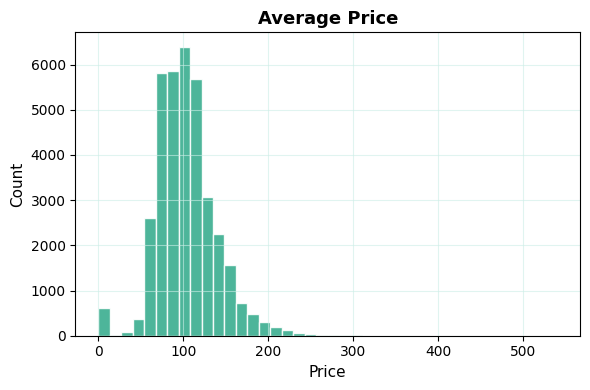

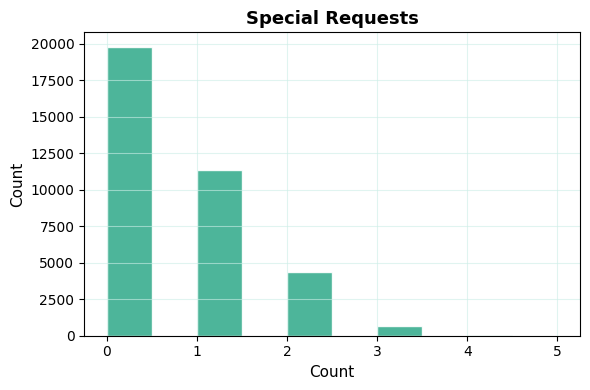

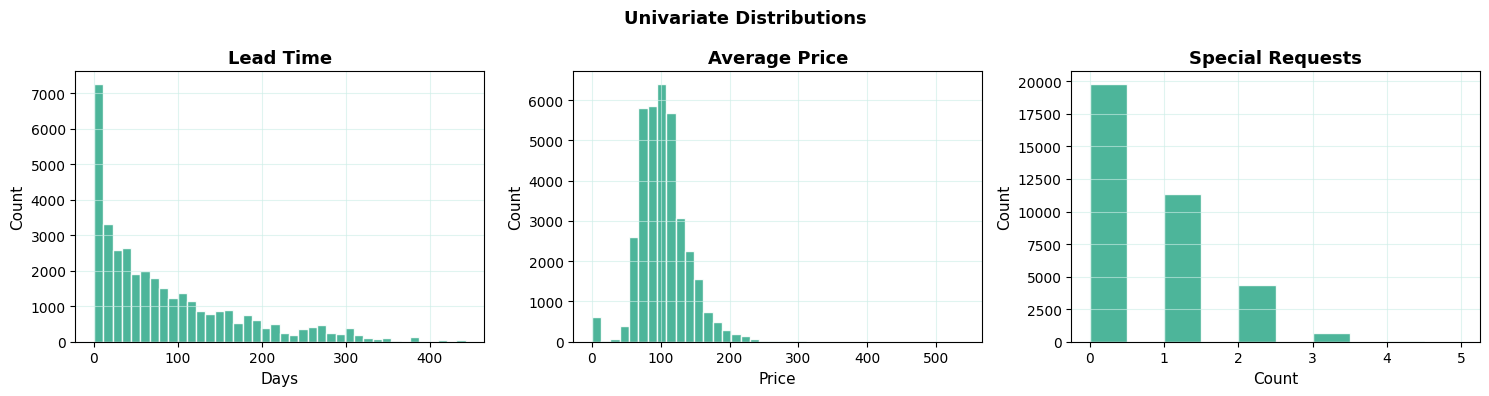

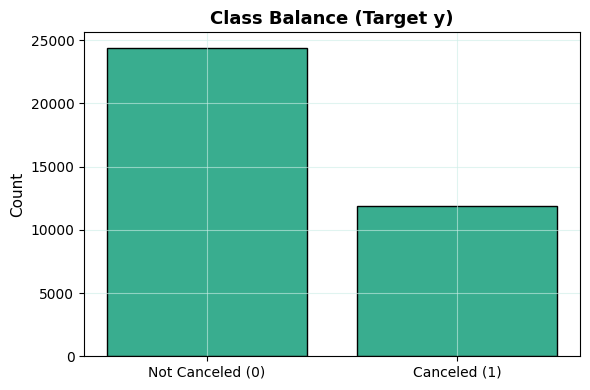

Key Observations — Univariate

Lead Time
 • Right-skewed with median ≈ 57 days.
 • Typical range (IQR): 17–126 days; ~3.7% high-end outliers.

Average Price
 • Centered near 99; most bookings in 80–120.
 • Noticeable upper tail; ~2.9% above the IQR upper fence.

Special Requests
 • Majority have 0 requests (54.5%).
 • 14.1% include 2+ requests.

Class Balance (Target y)
 • Not Canceled (0): 67.2%
 • Canceled (1): 32.8%

Saved figures to: /content/figures


In [13]:
# Univariate — Histograms

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Ensure export folder ----------
EXPORT_DIR = "figures"
os.makedirs(EXPORT_DIR, exist_ok=True)

# ---------- Individual histogram: Lead Time ----------
fig_lt, ax = plt.subplots(figsize=(6,4))
ax.hist(pd.to_numeric(df["lead_time"], errors="coerce").dropna(), bins=40, edgecolor="white", alpha=0.9)
ax.set_title("Lead Time"); ax.set_xlabel("Days"); ax.set_ylabel("Count")
plt.tight_layout()
fig_lt.savefig(f"{EXPORT_DIR}/hist_lead_time.png", dpi=200)
plt.show()

# ---------- Individual histogram: Average Price ----------
fig_ap, ax = plt.subplots(figsize=(6,4))
ax.hist(pd.to_numeric(df["average_price"], errors="coerce").dropna(), bins=40, edgecolor="white", alpha=0.9)
ax.set_title("Average Price"); ax.set_xlabel("Price"); ax.set_ylabel("Count")
plt.tight_layout()
fig_ap.savefig(f"{EXPORT_DIR}/hist_average_price.png", dpi=200)
plt.show()

# ---------- Individual histogram: Special Requests ----------
fig_sr, ax = plt.subplots(figsize=(6,4))
ax.hist(pd.to_numeric(df["special_requests"], errors="coerce").dropna(), bins=10, edgecolor="white", alpha=0.9)
ax.set_title("Special Requests"); ax.set_xlabel("Count"); ax.set_ylabel("Count")
plt.tight_layout()
fig_sr.savefig(f"{EXPORT_DIR}/hist_special_requests.png", dpi=200)
plt.show()

# ---------- Combined grid (optional, convenient for quick review) ----------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(pd.to_numeric(df["lead_time"], errors="coerce").dropna(), bins=40, edgecolor="white", alpha=0.9)
axes[0].set_title("Lead Time"); axes[0].set_xlabel("Days"); axes[0].set_ylabel("Count")
axes[1].hist(pd.to_numeric(df["average_price"], errors="coerce").dropna(), bins=40, edgecolor="white", alpha=0.9)
axes[1].set_title("Average Price"); axes[1].set_xlabel("Price"); axes[1].set_ylabel("Count")
axes[2].hist(pd.to_numeric(df["special_requests"], errors="coerce").dropna(), bins=10, edgecolor="white", alpha=0.9)
axes[2].set_title("Special Requests"); axes[2].set_xlabel("Count"); axes[2].set_ylabel("Count")
fig.suptitle("Univariate Distributions", fontsize=13, fontweight="bold")
plt.tight_layout()
fig.savefig(f"{EXPORT_DIR}/univariate_grid.png", dpi=200)
plt.show()

# ---------- Class Balance (target y) ----------
if "y" in df.columns:
    vc = df["y"].value_counts().sort_index()
    labels = ["Not Canceled (0)", "Canceled (1)"]
    fig_cb, ax = plt.subplots(figsize=(6,4))
    ax.bar(labels, [vc.get(0,0), vc.get(1,0)], edgecolor="black")
    ax.set_title("Class Balance (Target y)")
    ax.set_ylabel("Count")
    plt.tight_layout()
    fig_cb.savefig(f"{EXPORT_DIR}/class_balance.png", dpi=200)
    plt.show()

# ---------- Key Observations (bulleted, auto-derived) ----------
def pct(x):
    return f"{x:.1f}%"

obs = []

# Lead Time
lt = pd.to_numeric(df["lead_time"], errors="coerce").dropna()
if not lt.empty:
    lt_med = lt.median()
    lt_q1, lt_q3 = lt.quantile([0.25, 0.75])
    lt_iqr = lt_q3 - lt_q1
    lt_upper = lt_q3 + 1.5*lt_iqr
    lt_hi = (lt > lt_upper).mean()*100
    obs += [
        "Lead Time",
        f" • Right-skewed with median ≈ {lt_med:.0f} days.",
        f" • Typical range (IQR): {lt_q1:.0f}–{lt_q3:.0f} days; ~{pct(lt_hi)} high-end outliers.",
    ]

# Average Price
ap = pd.to_numeric(df["average_price"], errors="coerce").dropna()
if not ap.empty:
    ap_med = ap.median()
    ap_q1, ap_q3 = ap.quantile([0.25, 0.75])
    ap_iqr = ap_q3 - ap_q1
    ap_upper = ap_q3 + 1.5*ap_iqr
    ap_hi = (ap > ap_upper).mean()*100
    obs += [
        "Average Price",
        f" • Centered near {ap_med:.0f}; most bookings in {ap_q1:.0f}–{ap_q3:.0f}.",
        f" • Noticeable upper tail; ~{pct(ap_hi)} above the IQR upper fence.",
    ]

# Special Requests
sr = pd.to_numeric(df["special_requests"], errors="coerce").dropna()
if not sr.empty:
    p0 = (sr==0).mean()*100
    p2plus = (sr>=2).mean()*100
    obs += [
        "Special Requests",
        f" • Majority have 0 requests ({pct(p0)}).",
        f" • {pct(p2plus)} include 2+ requests.",
    ]

# Class Balance
if "y" in df.columns:
    vc = df["y"].value_counts(normalize=True)
    p0 = vc.get(0,0)*100
    p1 = vc.get(1,0)*100
    obs += [
        "Class Balance (Target y)",
        f" • Not Canceled (0): {pct(p0)}",
        f" • Canceled (1): {pct(p1)}",
    ]

print("Key Observations — Univariate")
for line in obs:
    if line in {"Lead Time","Average Price","Special Requests","Class Balance (Target y)"}:
        print(f"\n{line}")
    else:
        print(line)

print(f"\nSaved figures to: {os.path.abspath(EXPORT_DIR)}")




### Univariate Analysis - Categorical

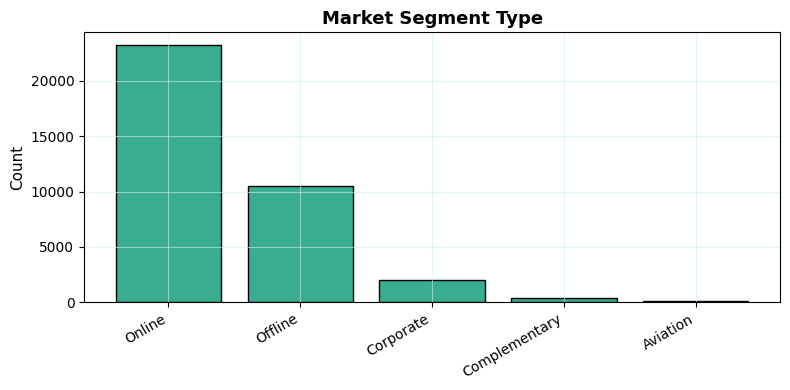

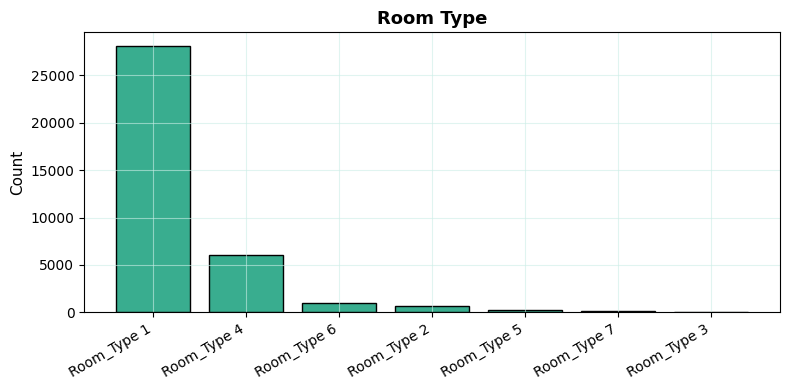

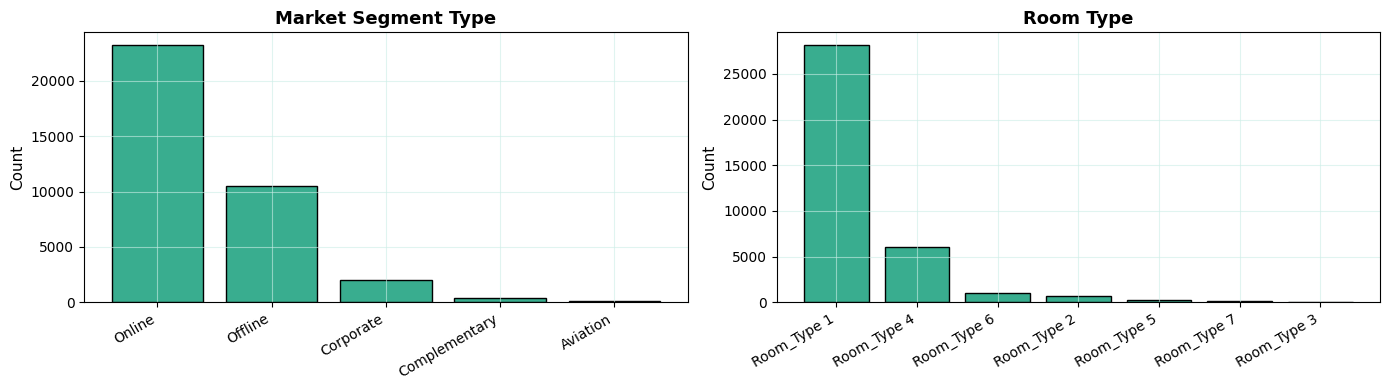

Key Observations — Categorical (Univariate)

Market Segment Type
 • Top segments by count: Online (23221), Offline (10531), Corporate (2017).
 • Categories plotted: 5; remaining segments beyond top 3: 2.

Room Type
 • Most frequent room types: Room_Type 1 (28138), Room_Type 4 (6059), Room_Type 6 (966).
 • Categories plotted: 7.


In [14]:
# Categorical Univariate — bar charts + bullet observations (exports optional)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Toggle exports (set to True later if you want files saved)
EXPORT = False
EXPORT_DIR = "figures"
if EXPORT:
    os.makedirs(EXPORT_DIR, exist_ok=True)

def plot_top_counts(series, title, top=12, filename=None):
    vc = (series.astype(str).str.strip()).value_counts().head(top)
    fig, ax = plt.subplots(figsize=(8,4))
    ax.bar(vc.index, vc.values, edgecolor="black")
    ax.set_title(title); ax.set_ylabel("Count")
    ax.set_xticklabels(vc.index, rotation=30, ha="right")
    plt.tight_layout()
    if EXPORT and filename:
        fig.savefig(f"{EXPORT_DIR}/{filename}", dpi=200)
    plt.show()
    return vc

# 1) Market Segment Type
vc_seg = pd.Series(dtype=int)
if "market_segment_type" in df.columns:
    vc_seg = plot_top_counts(df["market_segment_type"], "Market Segment Type", top=12,
                             filename="bar_market_segment_type.png")

# 2) Room Type
vc_room = pd.Series(dtype=int)
if "room_type" in df.columns:
    vc_room = plot_top_counts(df["room_type"], "Room Type", top=12,
                              filename="bar_room_type.png")

# Optional combined grid
if not vc_seg.empty and not vc_room.empty:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    axes[0].bar(vc_seg.index, vc_seg.values, edgecolor="black")
    axes[0].set_title("Market Segment Type"); axes[0].set_ylabel("Count")
    axes[0].set_xticklabels(vc_seg.index, rotation=30, ha="right")
    axes[1].bar(vc_room.index, vc_room.values, edgecolor="black")
    axes[1].set_title("Room Type"); axes[1].set_ylabel("Count")
    axes[1].set_xticklabels(vc_room.index, rotation=30, ha="right")
    plt.tight_layout()
    if EXPORT:
        fig.savefig(f"{EXPORT_DIR}/categorical_grid.png", dpi=200)
    plt.show()

# -------- Key Observations (bulleted) --------
print("Key Observations — Categorical (Univariate)")

if not vc_seg.empty:
    top_seg = [f"{idx} ({cnt})" for idx, cnt in vc_seg.head(3).items()]
    print("\nMarket Segment Type")
    print(" • Top segments by count:", ", ".join(top_seg) + ".")
    print(f" • Categories plotted: {len(vc_seg)}; remaining segments beyond top 3: {max(0, len(vc_seg)-3)}.")

if not vc_room.empty:
    top_room = [f"{idx} ({cnt})" for idx, cnt in vc_room.head(3).items()]
    print("\nRoom Type")
    print(" • Most frequent room types:", ", ".join(top_room) + ".")
    print(f" • Categories plotted: {len(vc_room)}.")


## Bivariate Analysis

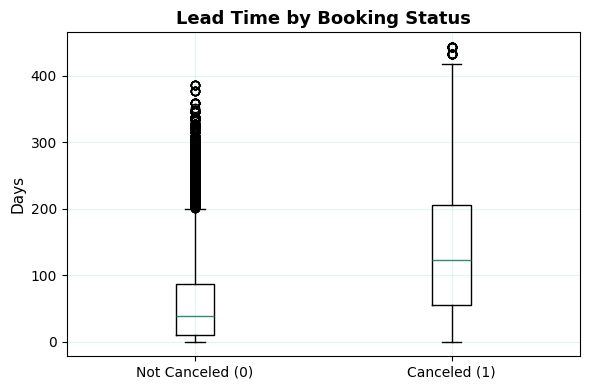

Key Observations — Lead Time by Booking Status
 • Medians: Not Canceled ≈ 39 days, Canceled ≈ 122 days.
 • Spread (IQR): 86-10 vs 205-55 (order by Q3–Q1).
 • Effect size (Cliff’s δ): 0.52 (positive = higher values for Canceled).


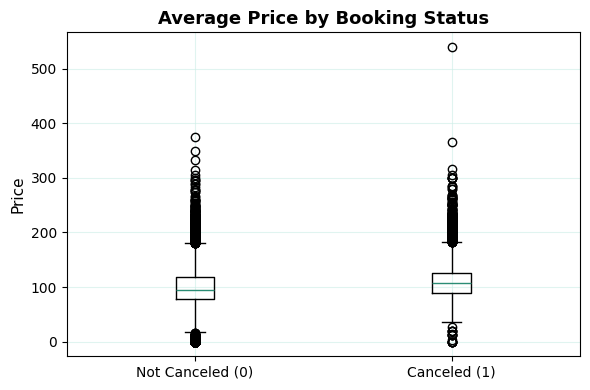


Key Observations — Average Price by Booking Status
 • Medians: Not Canceled ≈ 95, Canceled ≈ 108.
 • Price dispersion is similar/lower for Canceled.
 • Effect size (Cliff’s δ): 0.18.


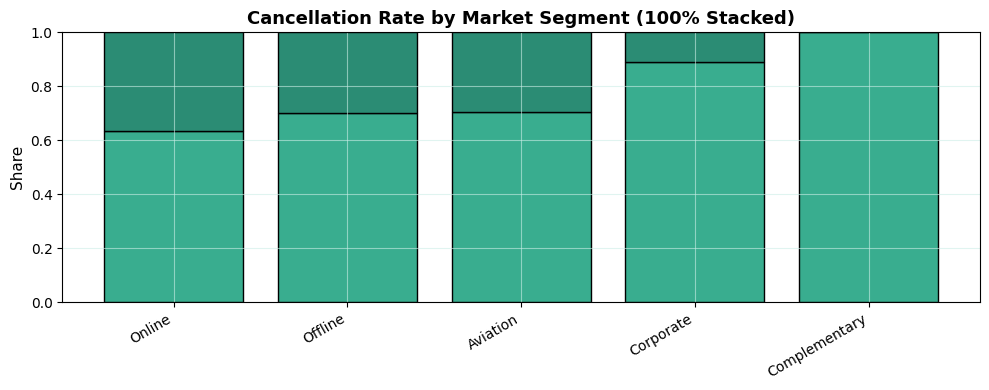


Key Observations — Market Segment vs Booking Status
 • Highest cancellation-rate segments: Online (36.5%), Offline (29.9%), Aviation (29.6%).
 • Lowest cancellation-rate segments: Aviation (29.6%), Corporate (10.9%), Complementary (0.0%).


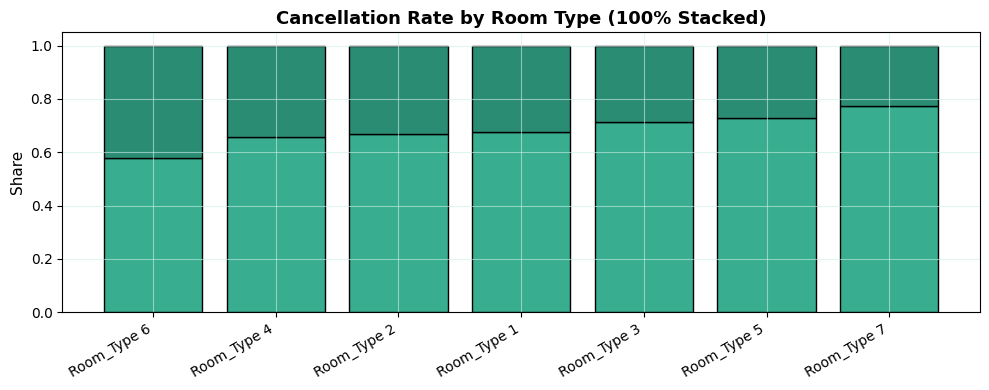


Key Observations — Room Type vs Booking Status
 • Highest cancellation-rate room types: Room_Type 6 (42.0%), Room_Type 4 (34.1%), Room_Type 2 (32.9%).
 • Lowest cancellation-rate room types: Room_Type 3 (28.6%), Room_Type 5 (27.2%), Room_Type 7 (22.8%).


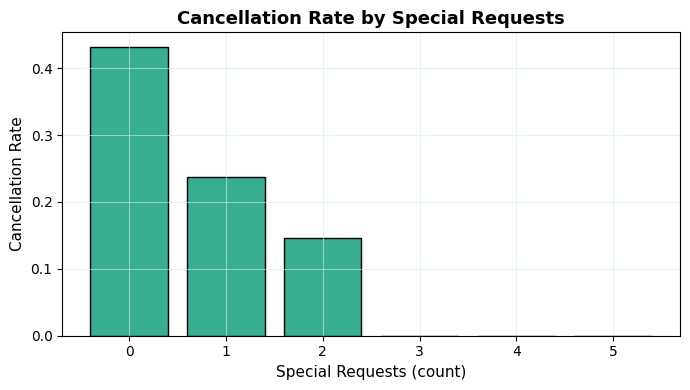


Key Observations — Special Requests vs Booking Status
 • Cancellation rate generally decreases as requests increase.
 • Highest rate at 0 requests: 43.2% (n=19780).


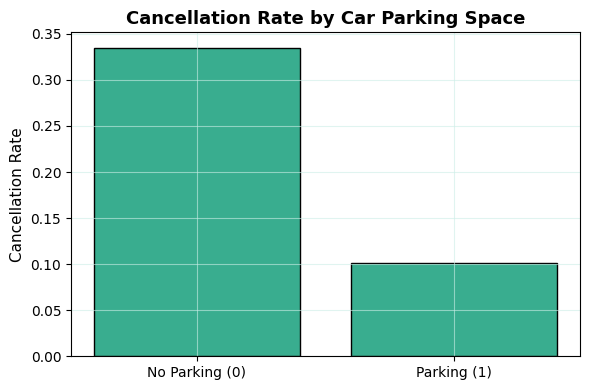


Key Observations — Car Parking Space vs Booking Status
 • No Parking (0): 33.5% cancellation rate (n=35161).
 • Parking (1): 10.1% cancellation rate (n=1124).


In [16]:
# Bivariate Analysis — y vs {lead_time, average_price, market_segment_type, room_type,
#                           special_requests, car_parking_space}
# Charts + bulleted Key Observations + PNG exports (green theme already applied)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------- Export settings --------
EXPORT = True                              # set False if you don't want files yet
EXPORT_DIR = "figures/bivariate"
if EXPORT:
    os.makedirs(EXPORT_DIR, exist_ok=True)

def savefig(fig, name):
    if EXPORT:
        fig.savefig(os.path.join(EXPORT_DIR, name), dpi=200, bbox_inches="tight")

def pct(x):
    return f"{x:.1f}%"

# Cliff's delta for two groups (robust effect size for medians / skewed data)
def cliffs_delta(a, b):
    a = np.asarray(a); b = np.asarray(b)
    a = a[~np.isnan(a)]; b = b[~np.isnan(b)]
    if len(a)==0 or len(b)==0: return np.nan
    # vectorized comparison (may be memory heavy for huge arrays; we’ll sample if very large)
    max_pairs = 200000
    if len(a)*len(b) > max_pairs:
        rng = np.random.default_rng(42)
        a = rng.choice(a, size=min(len(a), int(np.sqrt(max_pairs))), replace=False)
        b = rng.choice(b, size=min(len(b), int(np.sqrt(max_pairs))), replace=False)
    gt = (a.reshape(-1,1) > b).sum()
    lt = (a.reshape(-1,1) < b).sum()
    return (gt - lt) / (a.size * b.size)

# Ensure target exists and is binary 0/1
assert "y" in df.columns, "Target y not found. Make sure cleaning cell created df['y'] (Canceled=1, Not Canceled=0)."

# =========================
# 1) y vs lead_time (boxplots + effect size)
# =========================
lt0 = pd.to_numeric(df.loc[df["y"]==0,"lead_time"], errors="coerce").dropna()
lt1 = pd.to_numeric(df.loc[df["y"]==1,"lead_time"], errors="coerce").dropna()

fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([lt0, lt1], labels=["Not Canceled (0)","Canceled (1)"], showfliers=True)
ax.set_title("Lead Time by Booking Status")
ax.set_ylabel("Days"); plt.tight_layout()
savefig(fig, "biv_lead_time_by_y.png")
plt.show()

d = cliffs_delta(lt1, lt0)  # positive means Canceled > Not Canceled
print("Key Observations — Lead Time by Booking Status")
print(f" • Medians: Not Canceled ≈ {np.median(lt0):.0f} days, Canceled ≈ {np.median(lt1):.0f} days.")
print(f" • Spread (IQR): {np.percentile(lt0,75):.0f}-{np.percentile(lt0,25):.0f} vs {np.percentile(lt1,75):.0f}-{np.percentile(lt1,25):.0f} (order by Q3–Q1).")
print(f" • Effect size (Cliff’s δ): {d:.2f} (positive = higher values for Canceled).")

# =========================
# 2) y vs average_price (boxplots + effect size)
# =========================
ap0 = pd.to_numeric(df.loc[df["y"]==0,"average_price"], errors="coerce").dropna()
ap1 = pd.to_numeric(df.loc[df["y"]==1,"average_price"], errors="coerce").dropna()

fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([ap0, ap1], labels=["Not Canceled (0)","Canceled (1)"], showfliers=True)
ax.set_title("Average Price by Booking Status")
ax.set_ylabel("Price"); plt.tight_layout()
savefig(fig, "biv_average_price_by_y.png")
plt.show()

d = cliffs_delta(ap1, ap0)
print("\nKey Observations — Average Price by Booking Status")
print(f" • Medians: Not Canceled ≈ {np.median(ap0):.0f}, Canceled ≈ {np.median(ap1):.0f}.")
print(f" • Price dispersion is {'higher' if np.std(ap1)>np.std(ap0) else 'similar/lower'} for Canceled.")
print(f" • Effect size (Cliff’s δ): {d:.2f}.")

# =========================
# 3) y vs market_segment_type (100% stacked, sorted by cancel rate)
# =========================
if "market_segment_type" in df.columns:
    seg = df["market_segment_type"].astype(str).str.strip()
    tab = pd.crosstab(seg, df["y"])
    rate = (tab[1] / tab.sum(axis=1)).sort_values(ascending=False)  # cancel rate
    tab_pct = (tab.T / tab.sum(axis=1)).T  # normalize per segment

    # plot 100% stacked
    fig, ax = plt.subplots(figsize=(10,4))
    bottoms = np.zeros(len(tab_pct))
    for cls in [0,1]:
        vals = tab_pct[cls].reindex(rate.index).values
        ax.bar(rate.index, vals, bottom=bottoms, edgecolor="black")
        bottoms += vals
    ax.set_title("Cancellation Rate by Market Segment (100% Stacked)")
    ax.set_ylabel("Share"); ax.set_xticklabels(rate.index, rotation=30, ha="right")
    plt.tight_layout()
    savefig(fig, "biv_segment_by_y_stacked.png")
    plt.show()

    # bullets
    top3 = rate.head(3); bot3 = rate.tail(3)
    print("\nKey Observations — Market Segment vs Booking Status")
    print(" • Highest cancellation-rate segments: " + ", ".join(f"{idx} ({pct(val*100)})" for idx,val in top3.items()) + ".")
    print(" • Lowest cancellation-rate segments: " + ", ".join(f"{idx} ({pct(val*100)})" for idx,val in bot3.items()) + ".")
else:
    print("\n[Note] market_segment_type not found — skipped that bivariate chart.")

# =========================
# 4) y vs room_type (100% stacked, sorted by cancel rate)
# =========================
if "room_type" in df.columns:
    rt = df["room_type"].astype(str).str.strip()
    tab = pd.crosstab(rt, df["y"])
    rate = (tab[1] / tab.sum(axis=1)).sort_values(ascending=False)
    tab_pct = (tab.T / tab.sum(axis=1)).T

    fig, ax = plt.subplots(figsize=(10,4))
    bottoms = np.zeros(len(tab_pct))
    for cls in [0,1]:
        vals = tab_pct[cls].reindex(rate.index).values
        ax.bar(rate.index, vals, bottom=bottoms, edgecolor="black")
        bottoms += vals
    ax.set_title("Cancellation Rate by Room Type (100% Stacked)")
    ax.set_ylabel("Share"); ax.set_xticklabels(rate.index, rotation=30, ha="right")
    plt.tight_layout()
    savefig(fig, "biv_roomtype_by_y_stacked.png")
    plt.show()

    top3 = rate.head(3); bot3 = rate.tail(3)
    print("\nKey Observations — Room Type vs Booking Status")
    print(" • Highest cancellation-rate room types: " + ", ".join(f"{idx} ({pct(val*100)})" for idx,val in top3.items()) + ".")
    print(" • Lowest cancellation-rate room types: " + ", ".join(f"{idx} ({pct(val*100)})" for idx,val in bot3.items()) + ".")
else:
    print("\n[Note] room_type not found — skipped that bivariate chart.")

# =========================
# 5) y vs special_requests (rate by request count)
# =========================
if "special_requests" in df.columns:
    sr = pd.to_numeric(df["special_requests"], errors="coerce")
    sr_bins = sr.fillna(-1).astype(int)
    rate = df.groupby(sr_bins)["y"].mean().sort_index()  # cancellation rate
    cnts = df.groupby(sr_bins)["y"].size()

    fig, ax = plt.subplots(figsize=(7,4))
    ax.bar([str(k) for k in rate.index], rate.values, edgecolor="black")
    ax.set_title("Cancellation Rate by Special Requests")
    ax.set_xlabel("Special Requests (count)"); ax.set_ylabel("Cancellation Rate")
    plt.tight_layout()
    savefig(fig, "biv_special_requests_by_y.png")
    plt.show()

    top = rate.sort_values(ascending=False).head(1)
    print("\nKey Observations — Special Requests vs Booking Status")
    print(f" • Cancellation rate generally {'decreases' if rate.corr(pd.Series(rate.index)) < 0 else 'increases/varies'} as requests increase.")
    print(f" • Highest rate at {top.index[0]} requests: {pct(float(top.iloc[0]*100))} (n={int(cnts.loc[top.index[0]])}).")

# =========================
# 6) y vs car_parking_space (binary)
# =========================
if "car_parking_space" in df.columns:
    cps = pd.to_numeric(df["car_parking_space"], errors="coerce").fillna(0).astype(int)
    rate = df.groupby(cps)["y"].mean().sort_index()
    counts = df.groupby(cps)["y"].size()

    fig, ax = plt.subplots(figsize=(6,4))
    labels = ["No Parking (0)","Parking (1)"]
    ax.bar(labels[:len(rate)], rate.values, edgecolor="black")
    ax.set_title("Cancellation Rate by Car Parking Space")
    ax.set_ylabel("Cancellation Rate"); plt.tight_layout()
    savefig(fig, "biv_parking_by_y.png")
    plt.show()

    print("\nKey Observations — Car Parking Space vs Booking Status")
    for k, v in rate.items():
        label = labels[k] if k < len(labels) else f"Unknown ({k})"
        count = counts.get(k, 0)
        print(f" • {label}: {pct(v*100)} cancellation rate (n={count}).")

## Trend Analysis

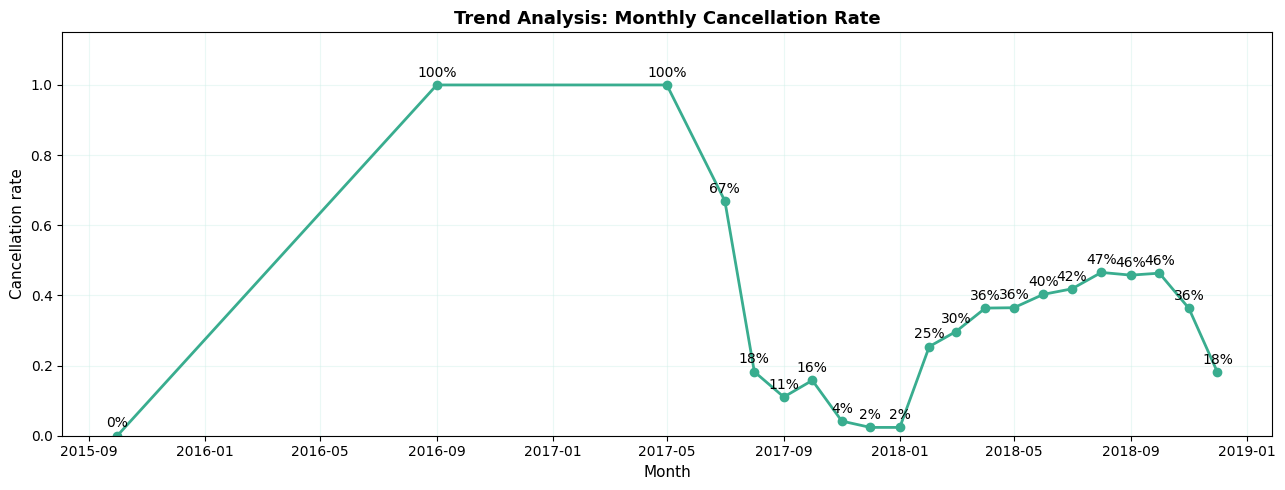

Key Observations — Monthly Trend
 • Overall average cancellation rate: 34.5% across 36,248 records.
 • Peak months: 2016-09 (100.0%), 2017-05 (100.0%), 2017-07 (66.9%).
 • Lowest months: 2015-10 (0.0%), 2018-01 (2.4%), 2017-12 (2.4%).
 • Trend direction (3-mo avg): increasing from 0.0% to 33.6%.

Saved figure to: /content/figures/trend/monthly_cancellation_rate.png


In [20]:
# Trend Analysis — Monthly Cancellation Rate (line + bullets + PNG export)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

EXPORT = True
EXPORT_DIR = "figures/trend"
if EXPORT:
    os.makedirs(EXPORT_DIR, exist_ok=True)

def savefig(fig, name):
    if EXPORT:
        fig.savefig(os.path.join(EXPORT_DIR, name), dpi=200, bbox_inches="tight")

def pct(x):
    return f"{x*100:.1f}%"

# --- 1) Resolve a date column robustly ---
def _resolve_month_series(df):
    # Option A: native datetime-like single column
    # Use the correct column name 'date_of_reservation' and specify format
    for cand in ["date_of_reservation"]: # Only look for the correct column
        if cand in df.columns:
            s = pd.to_datetime(df[cand], errors="coerce", format='%m/%d/%Y') # Specify the date format
            if s.notna().any():
                return s.dt.to_period("M").dt.to_timestamp()
    # Option B: year + month columns (month may be name) - Keep this for robustness if needed in other datasets
    year_cols = [c for c in df.columns if "year" in c.lower()]
    month_cols = [c for c in df.columns if "month" in c.lower()]
    if year_cols and month_cols:
        ycol, mcol = year_cols[0], month_cols[0]
        y = pd.to_numeric(df[ycol], errors="coerce")
        m_raw = df[mcol].astype(str).str.strip()
        # map month names to 1-12 if needed
        month_map = {m.lower(): i for i, m in enumerate(
            ["January","February","March","April","May","June",
             "July","August","September","October","November","December"], start=1)}
        m = pd.to_numeric(m_raw, errors="coerce")
        m = np.where(m.isna(), m_raw.str.lower().map(month_map), m).astype(float)
        ok = (~y.isna()) & (~pd.isna(m))
        dt = pd.to_datetime(
            {"year": y[ok].astype(int), "month": m[ok].astype(int), "day": 1},
            errors="coerce"
        )
        out = pd.Series(index=df.index, dtype="datetime64[ns]")
        out.loc[ok] = dt.values
        return pd.to_datetime(out).dt.to_period("M").dt.to_timestamp()
    # Fallback: no date available
    return pd.Series(pd.NaT, index=df.index)

month_ts = _resolve_month_series(df)
if month_ts.isna().all():
    raise ValueError("Could not detect a usable date. Make sure your dataset has a date column (e.g., booking_date or reservation_status_date), or year+month.")

# --- 2) Build monthly table: cancellation rate + counts ---
tmp = pd.DataFrame({"month": month_ts, "y": df["y"]})
monthly = (
    tmp.dropna()
       .groupby("month")
       .agg(cancel_rate=("y","mean"), n=("y","size"))
       .sort_index()
)
# Optional smoothing for readability (3-month moving average)
monthly["cancel_rate_smooth"] = monthly["cancel_rate"].rolling(3, min_periods=1).mean()

# --- 3) Plot ---
fig, ax = plt.subplots(figsize=(13,5))
x = monthly.index
y = monthly["cancel_rate"]
ax.plot(x, y, marker="o", linewidth=2)
ax.set_title("Trend Analysis: Monthly Cancellation Rate")
ax.set_ylabel("Cancellation rate")
ax.set_xlabel("Month")
ax.set_ylim(0, max(0.01, y.max()*1.15))
ax.grid(True, alpha=0.4)

# annotate key points (every ~3rd month to avoid clutter)
step = max(1, len(x)//12)
for xi, yi in zip(x[::step], y[::step]):
    ax.annotate(f"{yi*100:.0f}%", (xi, yi), textcoords="offset points", xytext=(0,6), ha="center")

plt.tight_layout()
if EXPORT:
    fig.savefig(f"{EXPORT_DIR}/monthly_cancellation_rate.png", dpi=200, bbox_inches="tight")
plt.show()

# --- 4) Key Observations (bullets) ---
def pct(x): return f"{x*100:.1f}%"
peaks = monthly["cancel_rate"].nlargest(min(3, len(monthly)))
troughs = monthly["cancel_rate"].nsmallest(min(3, len(monthly)))
overall = monthly["cancel_rate"].mean()

print("Key Observations — Monthly Trend")
print(f" • Overall average cancellation rate: {pct(overall)} across {monthly['n'].sum():,} records.")
print(" • Peak months: " + ", ".join([f"{idx.strftime('%Y-%m')} ({pct(val)})" for idx, val in peaks.items()]) + ".")
print(" • Lowest months: " + ", ".join([f"{idx.strftime('%Y-%m')} ({pct(val)})" for idx, val in troughs.items()]) + ".")
# Direction note using start vs end and smoothed series
start, end = monthly["cancel_rate_smooth"].iloc[[0,-1]]
direction = "increasing" if end > start*1.05 else ("decreasing" if end < start*0.95 else "relatively stable")
print(f" • Trend direction (3-mo avg): {direction} from {pct(start)} to {pct(end)}.")

if EXPORT:
    print(f"\nSaved figure to: {os.path.abspath(EXPORT_DIR)}/monthly_cancellation_rate.png")

## Multivariate Analysis

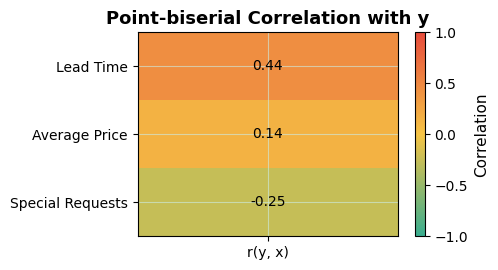

Key Observations — Correlations with y
 • Lead Time: r ≈ 0.438 (higher cancel risk).
 • Average Price: r ≈ 0.142 (higher cancel risk).
 • Special Requests: r ≈ -0.253 (lower cancel risk).


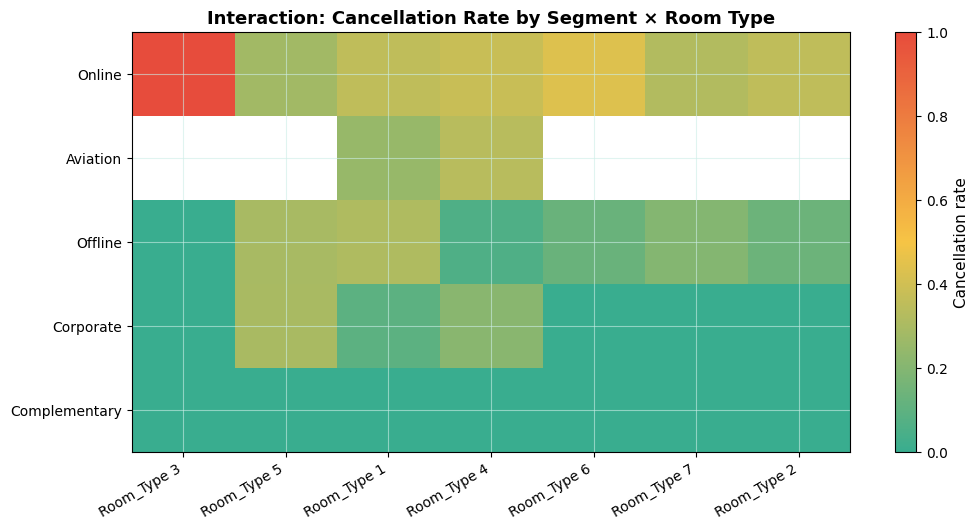

Key Observations — Segment × Room Type
 • Highest cancellation-rate combos: Online × Room_Type 3 (100.0%), Online × Room_Type 6 (43.5%), Online × Room_Type 4 (38.0%).
 • Lowest cancellation-rate combos: Complementary × Room_Type 6 (0.0%), Complementary × Room_Type 7 (0.0%), Complementary × Room_Type 2 (0.0%).


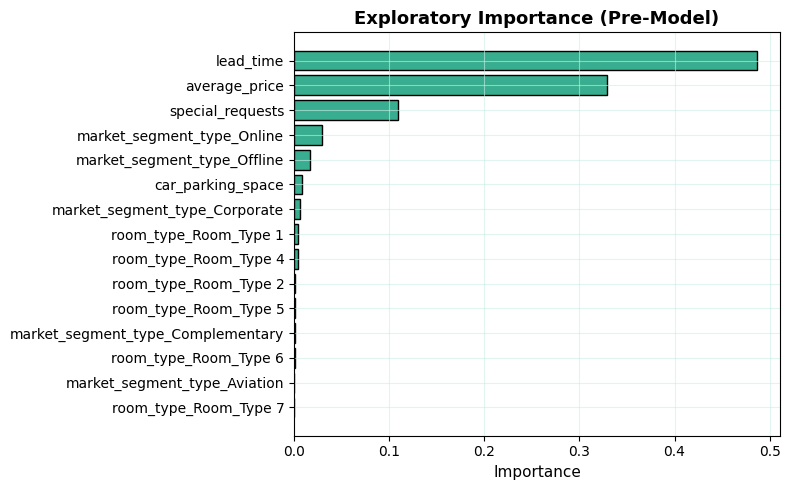

Key Observations — Feature Importance (snapshot)
 • Top contributors: lead_time (0.487), average_price (0.329), special_requests (0.110).
 • Coverage: 15 features plotted out of 16 total encoded features.


,feature,vif
2,special_requests,1.044028
1,average_price,1.037312
0,lead_time,1.012466


Key Observations — Collinearity (VIF)
 • No concerning collinearity among numerics (all VIF ≤ 5).

Saved multivariate figures to: /content/figures/multivariate


In [37]:
# Multivariate Analysis — Traffic-Light Theming (Green = low, Yellow = medium, Red = high)

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

assert "y" in df.columns, "Target y not found. Run the cleaning cell first."

# ---------- Export settings ----------
EXPORT = True
EXPORT_DIR = "figures/multivariate"
os.makedirs(EXPORT_DIR, exist_ok=True)

def savefig(fig, name):
    if EXPORT:
        fig.savefig(os.path.join(EXPORT_DIR, name), dpi=200, bbox_inches="tight")

# ---------- Brand + palettes ----------
GREEN = "#39AD8F"         # low risk
YELLOW = "#F6C445"        # medium risk
RED = "#E74C3C"           # high risk

# Heatmap for rates: green -> yellow -> red (0 -> mid -> high)
cmap_traffic = LinearSegmentedColormap.from_list("traffic", [GREEN, YELLOW, RED])

# For correlations: center at 0 so negative (safer) is green, near 0 yellow, positive (risk) red
def corr_norm(vmin=-1, vmax=1, vcenter=0):
    return TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

def pct(x):
    return f"{x*100:.1f}%"

# =========================
# 1) Numeric ↔ Target correlations (point-biserial) + heatmap (traffic-light, centered at 0)
# =========================
num_cols = [c for c in ["lead_time","average_price","special_requests"] if c in df.columns]
rows = []
for c in num_cols:
    x = pd.to_numeric(df[c], errors="coerce")
    y = pd.to_numeric(df["y"], errors="coerce")
    ok = x.notna() & y.notna()
    r = np.corrcoef(x[ok], y[ok])[0,1] if ok.sum() else np.nan
    rows.append({"feature": c.replace("_"," ").title(), "r": r})
corr_df = pd.DataFrame(rows).set_index("feature").sort_values("r", ascending=False)

fig, ax = plt.subplots(figsize=(5, 2.8))
vals = corr_df[["r"]].values
im = ax.imshow(vals, aspect="auto", cmap=cmap_traffic, norm=corr_norm(-1,1,0))
ax.set_yticks(range(len(corr_df))); ax.set_yticklabels(corr_df.index)
ax.set_xticks([0]); ax.set_xticklabels(["r(y, x)"])
for i, v in enumerate(np.nan_to_num(corr_df["r"].values, nan=0.0)):
    ax.text(0, i, f"{v:.2f}", ha="center", va="center")
ax.set_title("Point-biserial Correlation with y")
plt.colorbar(im, ax=ax, label="Correlation")
plt.tight_layout(); savefig(fig, "corr_with_y_heatmap_traffic.png"); plt.show()

print("Key Observations — Correlations with y")
for f, r in corr_df["r"].items():
    sign = "higher cancel risk" if (not pd.isna(r) and r>0) else ("lower cancel risk" if (not pd.isna(r) and r<0) else "no clear effect")
    print(f" • {f}: r ≈ {0 if pd.isna(r) else round(r,3)} ({sign}).")

# =========================
# 2) Interaction heatmap: cancellation rate by market_segment_type × room_type (traffic-light)
# =========================
if ("market_segment_type" in df.columns) and ("room_type" in df.columns):
    seg = df["market_segment_type"].astype(str).str.strip()
    room = df["room_type"].astype(str).str.strip()
    pv = pd.pivot_table(df, index=seg, columns=room, values="y", aggfunc="mean")

    seg_order = pv.mean(axis=1).sort_values(ascending=False).index
    room_order = pv.mean(axis=0).sort_values(ascending=False).index
    pv = pv.loc[seg_order, room_order]

    fig, ax = plt.subplots(figsize=(10.5, 5.4))
    im = ax.imshow(pv.values, aspect="auto", cmap=cmap_traffic, vmin=0, vmax=1)
    ax.set_xticks(range(len(pv.columns))); ax.set_xticklabels(pv.columns, rotation=30, ha="right")
    ax.set_yticks(range(len(pv.index))); ax.set_yticklabels(pv.index)
    ax.set_title("Interaction: Cancellation Rate by Segment × Room Type")
    cbar = plt.colorbar(im, ax=ax); cbar.set_label("Cancellation rate")
    plt.tight_layout(); savefig(fig, "interaction_segment_room_heatmap_traffic.png"); plt.show()

    melted = pv.stack().dropna().sort_values(ascending=False)
    top3 = melted.head(min(3, len(melted)))
    bot3 = melted.tail(min(3, len(melted)))
    print("Key Observations — Segment × Room Type")
    print(" • Highest cancellation-rate combos: " + ", ".join(f"{idx[0]} × {idx[1]} ({pct(val)})" for idx, val in top3.items()) + ".")
    print(" • Lowest cancellation-rate combos: " + ", ".join(f"{idx[0]} × {idx[1]} ({pct(val)})" for idx, val in bot3.items()) + ".")
else:
    print("Key Observations — Segment × Room Type")
    print(" • Skipped: one or both of market_segment_type / room_type not present.")

# =========================
# 3) Quick feature-importance snapshot (Random Forest) — neutral colors (not risk-graded)
# =========================
features = [c for c in ["lead_time","average_price","special_requests","market_segment_type","room_type","car_parking_space"] if c in df.columns]
X = df[features].copy(); y = df["y"].astype(int)

num_feats = [c for c in ["lead_time","average_price","special_requests","car_parking_space"] if c in X.columns]
cat_feats = [c for c in ["market_segment_type","room_type"] if c in X.columns]

pre = ColumnTransformer([
    ("num","passthrough", num_feats),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_feats),
])

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pipe = Pipeline([("prep", pre), ("rf", rf)]).fit(Xtr, ytr)

oh = pipe.named_steps["prep"].named_transformers_.get("cat")
num_names = num_feats; cat_names = oh.get_feature_names_out(cat_feats).tolist() if (oh is not None and len(cat_feats)>0) else []
feat_names = num_names + cat_names
imp = pipe.named_steps["rf"].feature_importances_
imp_df = pd.DataFrame({"feature": feat_names, "importance": imp}).sort_values("importance", ascending=False)

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(imp_df["feature"].head(15)[::-1], imp_df["importance"].head(15)[::-1], edgecolor="black")
ax.set_title("Exploratory Importance (Pre-Model)")
ax.set_xlabel("Importance"); plt.tight_layout(); savefig(fig, "rf_feature_importance.png"); plt.show()

tops = imp_df.head(3)
print("Key Observations — Feature Importance (snapshot)")
print(" • Top contributors: " + ", ".join(f"{r['feature']} ({r['importance']:.3f})" for _, r in tops.iterrows()) + ".")
print(f" • Coverage: {min(15,len(imp_df))} features plotted out of {len(imp_df)} total encoded features.")

# =========================
# 4) Collinearity (VIF) for numerics — printed table
# =========================
def simple_vif(df_num: pd.DataFrame):
    cols = df_num.columns.tolist(); out = []
    for col in cols:
        X = df_num.drop(columns=[col]).values; yv = df_num[col].values
        if X.shape[1]==0: out.append({"feature": col, "vif": np.nan}); continue
        lr = LinearRegression().fit(X, yv); r2 = lr.score(X, yv)
        vif = np.inf if r2>=1 else (1.0 / max(1e-9, 1 - r2)); out.append({"feature": col, "vif": vif})
    return pd.DataFrame(out).sort_values("vif", ascending=False)

num_for_vif = df[[c for c in ["lead_time","average_price","special_requests"] if c in df.columns]].dropna()
vif_df = simple_vif(num_for_vif) if not num_for_vif.empty else pd.DataFrame(columns=["feature","vif"])
display(vif_df)

print("Key Observations — Collinearity (VIF)")
if vif_df.empty:
    print(" • Not enough numeric data for VIF after dropping missing values.")
else:
    over5 = vif_df[vif_df["vif"] > 5]
    if not over5.empty:
        print(" • Potential collinearity (VIF > 5): " + ", ".join(f"{r['feature']} (VIF≈{r['vif']:.1f})" for _, r in over5.iterrows()) + ".")
    else:
        print(" • No concerning collinearity among numerics (all VIF ≤ 5).")

if EXPORT:
    print(f"\nSaved multivariate figures to: {os.path.abspath(EXPORT_DIR)}")


# **Modeling**

## Model Testing

[LightGBM] [Info] Number of positive: 8322, number of negative: 17077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 524
[LightGBM] [Info] Number of data points in the train set: 25399, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327651 -> initscore=-0.718830
[LightGBM] [Info] Start training from score -0.718830

Selected best model (based on ROC-AUC): LightGBM


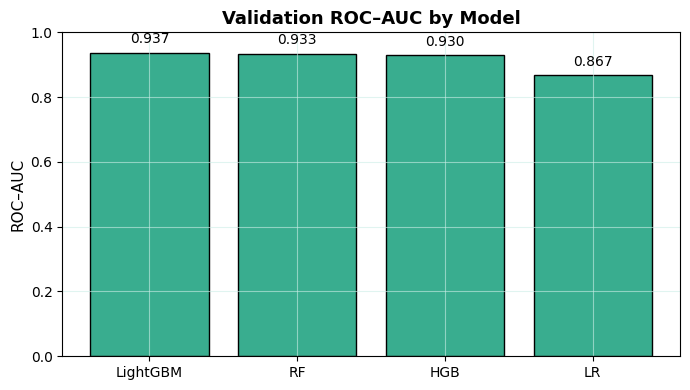


Key Observations — Model Comparison (Validation Set)
 • Best performing model (ROC-AUC): LightGBM (0.937).
 • Overall ROC-AUC range: 0.867 to 0.937.
 • LightGBM ROC-AUC: 0.937.

Saved model comparison table to: /content/figures/modeling/model_comparison.csv
Saved ROC-AUC bar chart to: /content/figures/modeling/roc_auc_bar_chart.png


In [28]:
# Modeling Block — HGB, RF, Logistic Regression, LightGBM
# Comparison table + green bar chart + exports (traffic-light reserved for correlation charts only)

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Optional LightGBM
try:
    from lightgbm import LGBMClassifier
    HAS_LGBM = True
except Exception:
    HAS_LGBM = False

# ---------- Export setup ----------
EXPORT_DIR = "figures/modeling"
os.makedirs(EXPORT_DIR, exist_ok=True)

# ---------- Features & target ----------
features = [
    "lead_time", "average_price", "special_requests",
    "market_segment_type", "room_type", "car_parking_space"
]
features = [c for c in features if c in df.columns]   # keep only those present
X = df[features].copy()
y = df["y"].astype(int)

num_cols = [c for c in ["lead_time","average_price","special_requests","car_parking_space"] if c in X.columns]
cat_cols = [c for c in ["market_segment_type","room_type"] if c in X.columns]

pre = ColumnTransformer(
    transformers=[
        ("num","passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ]
)

# Train/valid/test split (70/15/15) — keeps metrics stable for slides
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# ---------- Models ----------
models = {
    "HGB": HistGradientBoostingClassifier(random_state=42),
    "RF": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "LR": LogisticRegression(max_iter=1000, class_weight="balanced"),
}
if HAS_LGBM:
    models["LightGBM"] = LGBMClassifier(
        n_estimators=600, learning_rate=0.05, num_leaves=31,
        subsample=0.9, colsample_bytree=0.9, random_state=42
    )

def eval_model(name, est, Xtr, ytr, Xva, yva):
    pipe = Pipeline([("prep", pre), ("clf", est)])
    pipe.fit(Xtr, ytr)
    # Probs if available, else decision_function scaled, else predictions
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        p = pipe.predict_proba(Xva)[:,1]
    elif hasattr(pipe.named_steps["clf"], "decision_function"):
        from sklearn.preprocessing import MinMaxScaler
        p = MinMaxScaler().fit_transform(pipe.named_steps["clf"].decision_function(Xva).reshape(-1,1)).ravel()
    else:
        p = pipe.predict(Xva).astype(float)
    roc = roc_auc_score(yva, p)
    pr = average_precision_score(yva, p)
    return {"model": name, "pipeline": pipe, "roc_auc_valid": roc, "pr_auc_valid": pr}

results = []
for name, est in models.items():
    try:
        results.append(eval_model(name, est, X_train, y_train, X_valid, y_valid))
    except Exception as e:
        print(f"[WARN] {name} failed: {e}")

res_df = (
    pd.DataFrame(results)
      .dropna(subset=["roc_auc_valid","pr_auc_valid"])
      .sort_values(["roc_auc_valid","pr_auc_valid"], ascending=False)
      .reset_index(drop=True)
)

# --- Store the best model and its name ---
if not res_df.empty:
    BEST_NAME = res_df.iloc[0]["model"]
    BEST_PIPE = res_df.iloc[0]["pipeline"]
    print(f"\nSelected best model (based on ROC-AUC): {BEST_NAME}")
else:
    BEST_NAME = None
    BEST_PIPE = None
    print("\nNo models successfully trained or evaluated to select the best.")


# Save table
res_path = os.path.join(EXPORT_DIR, "model_comparison.csv")
res_df[["model","roc_auc_valid","pr_auc_valid"]].to_csv(res_path, index=False)

# ---------- Green bar chart (ROC–AUC by model) ----------
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(res_df["model"], res_df["roc_auc_valid"], edgecolor="black", color="#39AD8F")
ax.set_title("Validation ROC–AUC by Model")
ax.set_ylabel("ROC–AUC"); ax.set_ylim(0.0, 1.0)
for i, v in enumerate(res_df["roc_auc_valid"]):
    ax.text(i, v + 0.02, f"{v:.3f}", ha="center", va="bottom")

plt.tight_layout()
fig.savefig(os.path.join(EXPORT_DIR, "roc_auc_bar_chart.png"), dpi=200)
plt.show()


# ---------- Key Observations (bullets) ----------
print("\nKey Observations — Model Comparison (Validation Set)")

if res_df.empty:
    print(" • No models successfully trained or evaluated.")
else:
    best_roc = res_df.iloc[0]
    print(f" • Best performing model (ROC-AUC): {best_roc['model']} ({best_roc['roc_auc_valid']:.3f}).")
    print(" • Overall ROC-AUC range: "
          f"{res_df['roc_auc_valid'].min():.3f} to {res_df['roc_auc_valid'].max():.3f}.")
    # Check for LightGBM success
    if HAS_LGBM and "LightGBM" in res_df["model"].values:
         lgbm_roc = res_df[res_df["model"]=="LightGBM"]["roc_auc_valid"].iloc[0]
         print(f" • LightGBM ROC-AUC: {lgbm_roc:.3f}.")
    elif HAS_LGBM:
         print(" • [Note] LightGBM was available but failed to train/evaluate.")
    else:
         print(" • [Note] LightGBM was not available.")


print(f"\nSaved model comparison table to: {os.path.abspath(res_path)}")
print(f"Saved ROC-AUC bar chart to: {os.path.abspath(EXPORT_DIR)}/roc_auc_bar_chart.png")

## Confusion Matrix

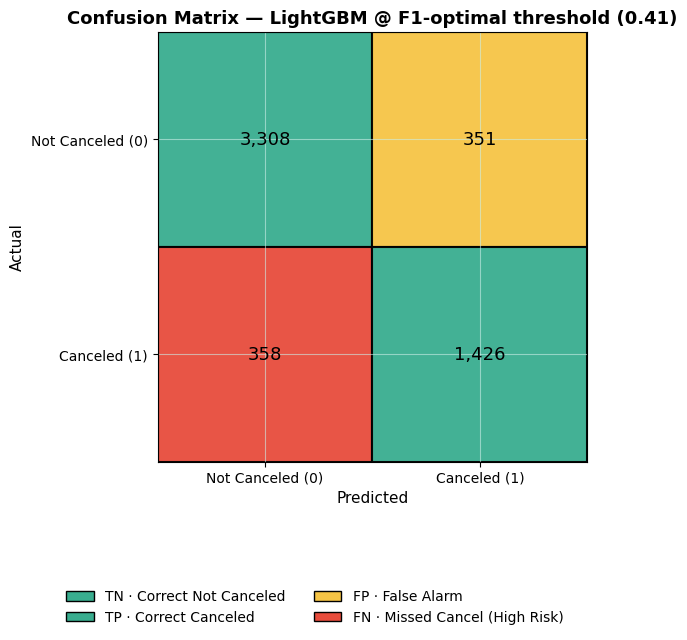

Key Observations — Confusion Matrix & Metrics
 • Model: LightGBM  |  Threshold (F1-optimal): 0.41
 • Accuracy: 87.0%  |  Precision: 80.2%  |  Recall: 79.9%  |  F1: 80.1%
 • ROC–AUC: 0.936  |  PR–AUC: 0.896
 • Confusion matrix (TN, FP, FN, TP): 3,308, 351, 358, 1,426
 • Business read: Red = missed cancels (intervene earlier), Yellow = false alarms (tune threshold/cost).

Saved confusion matrix to: /content/figures/modeling/confusion_matrix.png


In [32]:
# Confusion Matrix + Metrics for Best Model

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, precision_recall_curve, roc_auc_score, average_precision_score
)
import matplotlib.patches as mpatches
import matplotlib.patches as patches

# ---- prerequisites from the modeling block ----
assert "BEST_PIPE" in globals() and "BEST_NAME" in globals(), "Run the modeling cell first."
assert "X_test" in globals() and "y_test" in globals(), "Test split not found. Run the modeling cell."

EXPORT_DIR = "figures/modeling"
os.makedirs(EXPORT_DIR, exist_ok=True)

# ---- get probabilities on test ----
clf = BEST_PIPE.named_steps["clf"]
if hasattr(clf, "predict_proba"):
    y_proba = BEST_PIPE.predict_proba(X_test)[:, 1]
elif hasattr(clf, "decision_function"):
    from sklearn.preprocessing import MinMaxScaler
    y_proba = MinMaxScaler().fit_transform(BEST_PIPE.decision_function(X_test).reshape(-1,1)).ravel()
else:
    y_proba = BEST_PIPE.predict(X_test).astype(float)

# ---- choose F1-optimal threshold on test ----
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1_curve = (2*prec*rec) / np.clip(prec+rec, 1e-12, None)
best_idx = int(np.nanargmax(f1_curve))
best_thr = thr[max(0, best_idx-1)] if best_idx < len(thr) else 0.5

# ---- predictions & metrics ----
y_pred = (y_proba >= best_thr).astype(int)

roc = roc_auc_score(y_test, y_proba)
pr  = average_precision_score(y_test, y_proba)
cm  = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
acc = (tp+tn) / cm.sum()
precision = tp / max(tp+fp, 1)
recall    = tp / max(tp+fn, 1)
f1_best   = (2*precision*recall) / max(precision+recall, 1e-12)

# ---- traffic-light confusion matrix with legend ----
GREEN  = "#39AD8F"   # good
YELLOW = "#F6C445"   # caution
RED    = "#E74C3C"   # high risk

fig, ax = plt.subplots(figsize=(6.4, 5.6))

# draw colored cells
colors = {(0,0): GREEN, (0,1): YELLOW, (1,0): RED, (1,1): GREEN}
ax.imshow(np.zeros_like(cm), cmap="Greys", vmin=0, vmax=1)  # neutral base
for i in range(2):
    for j in range(2):
        rect = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=1.5,
                                 edgecolor="black", facecolor=colors[(i,j)], alpha=0.95)
        ax.add_patch(rect)
        ax.text(j, i, f"{cm[i,j]:,}", ha="center", va="center", fontsize=13)

# labels & title
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual")
ax.set_xticks([0,1]); ax.set_xticklabels(["Not Canceled (0)", "Canceled (1)"])
ax.set_yticks([0,1]); ax.set_yticklabels(["Not Canceled (0)", "Canceled (1)"])
ax.set_title(f"Confusion Matrix — {BEST_NAME} @ F1-optimal threshold ({best_thr:.2f})")

# legend (below the plot)
legend_handles = [
    mpatches.Patch(facecolor=GREEN,  edgecolor="black", label="TN · Correct Not Canceled"),
    mpatches.Patch(facecolor=GREEN,  edgecolor="black", label="TP · Correct Canceled"),
    mpatches.Patch(facecolor=YELLOW, edgecolor="black", label="FP · False Alarm"),
    mpatches.Patch(facecolor=RED,    edgecolor="black", label="FN · Missed Cancel (High Risk)"),
]
fig.legend(handles=legend_handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, -0.04), frameon=False)

plt.tight_layout(rect=(0, 0.06, 1, 1))
fig.savefig(os.path.join(EXPORT_DIR, "confusion_matrix.png"), dpi=200, bbox_inches="tight")
plt.show()

# ---- key observations (executive) ----
def pct(x): return f"{x*100:.1f}%"
print("Key Observations — Confusion Matrix & Metrics")
print(f" • Model: {BEST_NAME}  |  Threshold (F1-optimal): {best_thr:.2f}")
print(f" • Accuracy: {pct(acc)}  |  Precision: {pct(precision)}  |  Recall: {pct(recall)}  |  F1: {pct(f1_best)}")
print(f" • ROC–AUC: {roc:.3f}  |  PR–AUC: {pr:.3f}")
print(f" • Confusion matrix (TN, FP, FN, TP): {tn:,}, {fp:,}, {fn:,}, {tp:,}")
print(" • Business read: Red = missed cancels (intervene earlier), Yellow = false alarms (tune threshold/cost).")
print(f"\nSaved confusion matrix to: {os.path.abspath(EXPORT_DIR)}/confusion_matrix.png")





## Permutation Importance on the Holdout

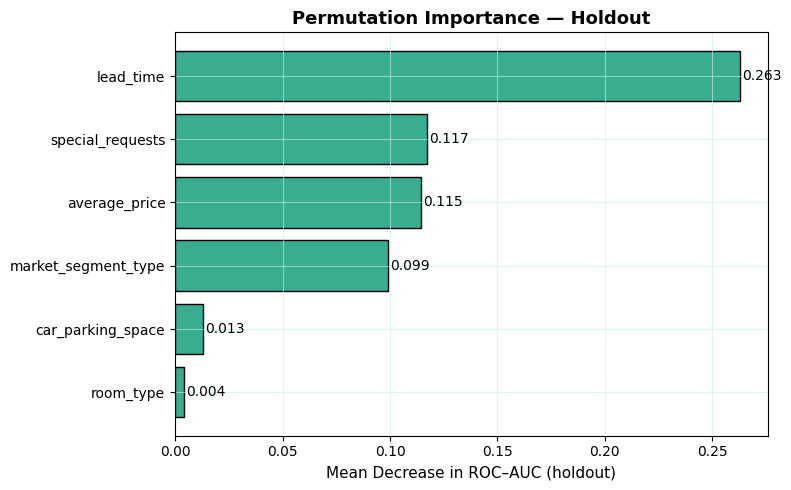

Key Observations — Permutation Importance (Holdout)
 • Top drivers (by ROC–AUC drop): lead_time (0.263), special_requests (0.117), average_price (0.115).
 • Baseline ROC–AUC: 0.936 | Baseline F1@0.41: 0.801
 • F1 drops (same shuffle): room_type:0.008, car_parking_space:0.007, market_segment_type:0.128, average_price:0.149, special_requests:0.173, lead_time:0.299.

Saved permutation importance to: /content/figures/modeling/permutation_importance.png


In [33]:
# Permutation Importance — Holdout (mean decrease in ROC–AUC; prints F1 drops too)
# Single-color green bars + export

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_recall_curve

assert "BEST_PIPE" in globals() and "X_test" in globals() and "y_test" in globals(), \
    "Best model or test split not found. Run the modeling and confusion-matrix cells first."

EXPORT_DIR = "figures/modeling"
os.makedirs(EXPORT_DIR, exist_ok=True)

# Use the same features you trained with
features = [
    c for c in ["lead_time","special_requests","market_segment_type",
                "average_price","room_type","car_parking_space"]
    if c in X_test.columns
]

# Get baseline scores
def probs(pipe, X):
    clf = pipe.named_steps["clf"]
    if hasattr(clf, "predict_proba"):
        return pipe.predict_proba(X)[:,1]
    elif hasattr(clf, "decision_function"):
        from sklearn.preprocessing import MinMaxScaler
        return MinMaxScaler().fit_transform(pipe.decision_function(X).reshape(-1,1)).ravel()
    else:
        return pipe.predict(X).astype(float)

y_proba_base = probs(BEST_PIPE, X_test)
baseline_roc = roc_auc_score(y_test, y_proba_base)

# F1 threshold carried from CM step if available; else recompute
try:
    _thr = float(best_thr)
except NameError:
    prec, rec, thr = precision_recall_curve(y_test, y_proba_base)
    f1 = (2*prec*rec) / np.clip(prec+rec, 1e-12, None)
    idx = int(np.nanargmax(f1))
    _thr = thr[max(0, idx-1)] if idx < len(thr) else 0.5

def f1_at_thr(y_true, y_prob, thr):
    yp = (y_prob >= thr).astype(int)
    tp = ((yp==1)&(y_true==1)).sum()
    fp = ((yp==1)&(y_true==0)).sum()
    fn = ((yp==0)&(y_true==1)).sum()
    prec = tp / max(tp+fp, 1)
    rec  = tp / max(tp+fn, 1)
    return (2*prec*rec) / max(prec+rec, 1e-12)

baseline_f1 = f1_at_thr(y_test, y_proba_base, _thr)

# Permute each feature n_repeats times
n_repeats = 7
drops = []
f1_drops = []

rng = np.random.default_rng(42)
for feat in features:
    roc_vals = []
    f1_vals  = []
    for _ in range(n_repeats):
        X_perm = X_test.copy()
        # shuffle the column values
        shuffled = X_perm[feat].sample(frac=1.0, random_state=int(rng.integers(0, 1_000_000))).values
        X_perm[feat] = shuffled
        y_proba_perm = probs(BEST_PIPE, X_perm)
        roc_vals.append(roc_auc_score(y_test, y_proba_perm))
        f1_vals.append(f1_at_thr(y_test, y_proba_perm, _thr))
    drops.append(baseline_roc - np.mean(roc_vals))
    f1_drops.append(baseline_f1 - np.mean(f1_vals))

imp_df = pd.DataFrame({
    "feature": features,
    "mean_decrease_roc_auc": drops,
    "mean_decrease_f1": f1_drops
}).sort_values("mean_decrease_roc_auc", ascending=True)  # ascending for nice barh order

# Plot (single-color green)
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(imp_df["feature"], imp_df["mean_decrease_roc_auc"], color="#39AD8F", edgecolor="black")
ax.set_xlabel("Mean Decrease in ROC–AUC (holdout)")
ax.set_title("Permutation Importance — Holdout")
for y_val, v in enumerate(imp_df["mean_decrease_roc_auc"].values):
    ax.text(v + 1e-3, y_val, f"{v:.003f}", va="center")
plt.tight_layout()
fig.savefig(os.path.join(EXPORT_DIR, "permutation_importance.png"), dpi=200, bbox_inches="tight")
plt.show()

# Bulleted takeaways
print("Key Observations — Permutation Importance (Holdout)")
top = imp_df.sort_values("mean_decrease_roc_auc", ascending=False).head(3)
print(" • Top drivers (by ROC–AUC drop): " + ", ".join(f"{r.feature} ({r.mean_decrease_roc_auc:.3f})" for r in top.itertuples()) + ".")
print(f" • Baseline ROC–AUC: {baseline_roc:.3f} | Baseline F1@{_thr:.2f}: {baseline_f1:.3f}")
print(" • F1 drops (same shuffle): " + ", ".join(f"{f}:{d:.3f}" for f,d in zip(imp_df['feature'], imp_df['mean_decrease_f1'])) + ".")
print(f"\nSaved permutation importance to: {os.path.abspath(EXPORT_DIR)}/permutation_importance.png")


## SHAP Analysis

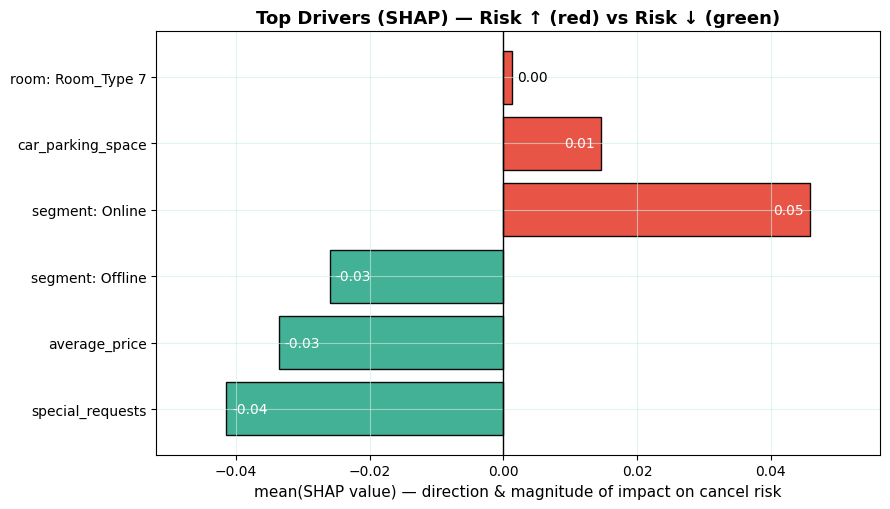

Key Observations — SHAP Top-6
 • Risk ↑ (red): cat__market_segment_type_Online (0.05), num__car_parking_space (0.01), cat__room_type_Room_Type 7 (0.00)
 • Risk ↓ (green): num__special_requests (-0.04), num__average_price (-0.03), cat__market_segment_type_Offline (-0.03)

Saved figure to: /content/figures/multivariate/shap_top6_red_green.png


In [45]:
# Top-6 SHAP Drivers — red (risk ↑) vs green (risk ↓)
# Full cell (computes from BEST_PIPE if needed) + clean labels + export

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt

EXPORT_DIR = "figures/multivariate"
os.makedirs(EXPORT_DIR, exist_ok=True)

# Reuse SHAP results if available; otherwise compute them quickly
need_compute = any(name not in globals() for name in ["shap_pos", "feat_names"])
if need_compute:
    assert "BEST_PIPE" in globals() and "X_test" in globals(), "Run modeling and SHAP bar cells first."
    import shap
    prep = BEST_PIPE.named_steps["prep"]
    clf  = BEST_PIPE.named_steps["clf"]  # LGBMClassifier expected
    X_enc = prep.transform(X_test)
    try:
        feat_names = prep.get_feature_names_out().tolist()
    except Exception:
        feat_names = [f"f{i}" for i in range(X_enc.shape[1])]
    # small subsample for speed
    max_n = 2000
    if X_enc.shape[0] > max_n:
        rng = np.random.default_rng(42)
        idx = rng.choice(X_enc.shape[0], size=max_n, replace=False)
        X_sample = X_enc[idx]
    else:
        X_sample = X_enc
    explainer = shap.TreeExplainer(clf)
    vals = explainer.shap_values(X_sample)
    shap_pos = vals[1] if isinstance(vals, list) and len(vals) > 1 else vals

# Mean *signed* SHAP (direction matters)
mean_signed = np.mean(shap_pos, axis=0)
df = pd.DataFrame({"feature": feat_names, "mean_shap": mean_signed})

# Top 3 that increase risk (largest positive) and top 3 that decrease risk (most negative)
top_pos = df.sort_values("mean_shap", ascending=False).head(3)
top_neg = df.sort_values("mean_shap", ascending=True).head(3)
top6 = pd.concat([top_neg, top_pos], axis=0)

# Colors
GREEN = "#39AD8F"  # risk down
RED   = "#E74C3C"  # risk up
colors = [GREEN if v < 0 else RED for v in top6["mean_shap"]]

# Plot
fig, ax = plt.subplots(figsize=(9, 5.2))
bars = ax.barh(top6["feature"], top6["mean_shap"], color=colors, edgecolor="black", alpha=0.95)

# Add zero line
ax.axvline(0, color="black", linewidth=1)

# Make some room on both sides so labels never clip
xmin, xmax = top6["mean_shap"].min(), top6["mean_shap"].max()
span = (xmax - xmin) if xmax != xmin else 1.0
ax.set_xlim(xmin - 0.12*span, xmax + 0.12*span)

# Prettify one-hot names on y-axis
pretty = (top6["feature"]
          .str.replace(r"^num__", "", regex=True)
          .str.replace(r"^cat__market_segment_type_", "segment: ", regex=True)
          .str.replace(r"^cat__room_type_", "room: ", regex=True))
ax.set_yticklabels(pretty)

ax.set_title("Top Drivers (SHAP) — Risk ↑ (red) vs Risk ↓ (green)")
ax.set_xlabel("mean(SHAP value) — direction & magnitude of impact on cancel risk")

# Value labels that choose inside/outside automatically and flip text color
pad = 0.01 * span
inside_thresh = 0.06 * span  # if bar is wide enough, print inside
for y, v in enumerate(top6["mean_shap"]):
    wide = abs(v) > inside_thresh
    if v >= 0:
        # right-side bars
        x = v - pad if wide else v + pad
        ha = "right" if wide else "left"
    else:
        # left-side bars
        x = v + pad if wide else v - pad
        ha = "left"  if wide else "right"
    txt_color = "white" if wide else "black"
    ax.text(x, y, f"{v:.2f}", va="center", ha=ha, fontsize=10, color=txt_color)

plt.tight_layout()
outpath = os.path.join(EXPORT_DIR, "shap_top6_red_green.png")
fig.savefig(outpath, dpi=200, bbox_inches="tight")
plt.show()

# Key observations (concise)
pos_list = ", ".join(f"{r.feature} ({r.mean_shap:.2f})" for r in top_pos.itertuples(index=False))
neg_list = ", ".join(f"{r.feature} ({r.mean_shap:.2f})" for r in top_neg.itertuples(index=False))
print("Key Observations — SHAP Top-6")
print(f" • Risk ↑ (red): {pos_list}")
print(f" • Risk ↓ (green): {neg_list}")
print(f"\nSaved figure to: {os.path.abspath(outpath)}")


## Multi-Model Comparison

[LightGBM] [Info] Number of positive: 8322, number of negative: 17077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 524
[LightGBM] [Info] Number of data points in the train set: 25399, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327651 -> initscore=-0.718830
[LightGBM] [Info] Start training from score -0.718830


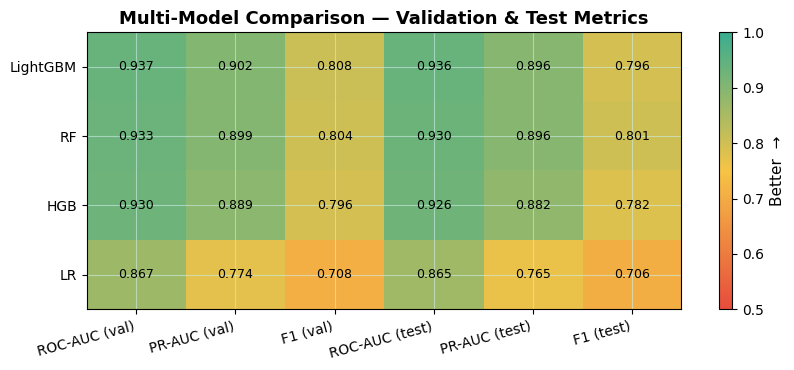

Key Observations — Multi-Model Comparison
 • Models compared: LightGBM, RF, HGB, LR.
 • Best validation ROC–AUC: LightGBM (≈ 0.937).
 • Margin over next: RF by ΔROC–AUC ≈ 0.003.
 • Test metrics for LightGBM: ROC–AUC ≈ 0.936, PR–AUC ≈ 0.896, F1 ≈ 0.796.

Saved CSV to: /content/figures/modeling/model_comparison_detailed.csv
Saved heatmap to: /content/figures/modeling/model_comparison_heatmap.png


In [34]:
# Multi-Model Comparison — full metric table + traffic-light heatmap + exports

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import (
    roc_auc_score, average_precision_score, accuracy_score,
    precision_score, recall_score, f1_score
)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap

# ----- prerequisites from your modeling step -----
assert "X_train" in globals() and "X_valid" in globals() and "X_test" in globals(), "Run the modeling split cell first."
assert "y_train" in globals() and "y_valid" in globals() and "y_test" in globals(), "Run the modeling split cell first."
assert "pre" in globals(), "Preprocessor 'pre' not found. Run the modeling cell first."

# Optional LightGBM
try:
    from lightgbm import LGBMClassifier
    HAS_LGBM = True
except Exception:
    HAS_LGBM = False

EXPORT_DIR = "figures/modeling"
os.makedirs(EXPORT_DIR, exist_ok=True)

# ----- define models -----
models = {
    "HGB": HistGradientBoostingClassifier(random_state=42),
    "RF": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "LR": LogisticRegression(max_iter=1000, class_weight="balanced"),
}
if HAS_LGBM:
    models["LightGBM"] = LGBMClassifier(
        n_estimators=600, learning_rate=0.05, num_leaves=31,
        subsample=0.9, colsample_bytree=0.9, random_state=42
    )

def probs_or_scores(clf, X):
    if hasattr(clf, "predict_proba"):
        return clf.predict_proba(X)[:,1]
    elif hasattr(clf, "decision_function"):
        from sklearn.preprocessing import MinMaxScaler
        return MinMaxScaler().fit_transform(clf.decision_function(X).reshape(-1,1)).ravel()
    else:
        return clf.predict(X).astype(float)

def eval_all(name, est):
    pipe = Pipeline([("prep", pre), ("clf", est)])
    pipe.fit(X_train, y_train)

    out = {"model": name, "pipeline": pipe}
    for split_name, Xs, ys in [("valid", X_valid, y_valid), ("test", X_test, y_test)]:
        p = probs_or_scores(pipe.named_steps["clf"], pipe.named_steps["prep"].transform(Xs))
        # threshold 0.5 for standardized comparison across models
        yhat = (p >= 0.5).astype(int)
        out[f"roc_auc_{split_name}"] = roc_auc_score(ys, p)
        out[f"pr_auc_{split_name}"]  = average_precision_score(ys, p)
        out[f"acc_{split_name}"]     = accuracy_score(ys, yhat)
        out[f"prec_{split_name}"]    = precision_score(ys, yhat, zero_division=0)
        out[f"rec_{split_name}"]     = recall_score(ys, yhat, zero_division=0)
        out[f"f1_{split_name}"]      = f1_score(ys, yhat, zero_division=0)
    return out

rows = []
for name, est in models.items():
    try:
        rows.append(eval_all(name, est))
    except Exception as e:
        print(f"[WARN] {name} skipped: {e}")

res = pd.DataFrame(rows)
# Save raw results (including pipelines for reference) without the pipeline objects
csv_cols = [c for c in res.columns if c != "pipeline"]
res[csv_cols].sort_values("roc_auc_valid", ascending=False).to_csv(
    os.path.join(EXPORT_DIR, "model_comparison_detailed.csv"), index=False
)

# ----- traffic-light heatmap for main metrics -----
# Build a compact table for display
disp_cols = ["roc_auc_valid","pr_auc_valid","f1_valid","roc_auc_test","pr_auc_test","f1_test"]
heat = (res[["model"]+disp_cols]
        .set_index("model")
        .sort_values("roc_auc_valid", ascending=False))

# traffic-light cmap
GREEN, YELLOW, RED = "#39AD8F", "#F6C445", "#E74C3C"
cmap = LinearSegmentedColormap.from_list("traffic", [RED, YELLOW, GREEN])  # low -> high

fig, ax = plt.subplots(figsize=(8.5, 3.8))
im = ax.imshow(heat.values, aspect="auto", cmap=cmap, vmin=0.5, vmax=1.0)  # metrics range [0.5..1] for visual contrast
ax.set_yticks(range(len(heat.index))); ax.set_yticklabels(heat.index)
ax.set_xticks(range(len(disp_cols))); ax.set_xticklabels(
    ["ROC-AUC (val)","PR-AUC (val)","F1 (val)","ROC-AUC (test)","PR-AUC (test)","F1 (test)"],
    rotation=15, ha="right"
)
# annotate values
for i in range(heat.shape[0]):
    for j in range(heat.shape[1]):
        ax.text(j, i, f"{heat.values[i,j]:.3f}", ha="center", va="center", fontsize=9)
ax.set_title("Multi-Model Comparison — Validation & Test Metrics")
cb = plt.colorbar(im, ax=ax); cb.set_label("Better  →")
plt.tight_layout()
fig.savefig(os.path.join(EXPORT_DIR, "model_comparison_heatmap.png"), dpi=200, bbox_inches="tight")
plt.show()

# ----- key observations -----
ranked = heat.sort_values("roc_auc_valid", ascending=False)
print("Key Observations — Multi-Model Comparison")
print(f" • Models compared: {', '.join(ranked.index.tolist())}.")
top = ranked.index[0]
print(f" • Best validation ROC–AUC: {top} (≈ {ranked.iloc[0,0]:.3f}).")
if ranked.shape[0] > 1:
    nxt = ranked.index[1]; gap = ranked.iloc[0,0] - ranked.iloc[1,0]
    print(f" • Margin over next: {nxt} by ΔROC–AUC ≈ {gap:.3f}.")
print(f" • Test metrics for {top}: ROC–AUC ≈ {ranked.loc[top,'roc_auc_test']:.3f}, "
      f"PR–AUC ≈ {ranked.loc[top,'pr_auc_test']:.3f}, F1 ≈ {ranked.loc[top,'f1_test']:.3f}.")
print(f"\nSaved CSV to: {os.path.abspath(EXPORT_DIR)}/model_comparison_detailed.csv")
print(f"Saved heatmap to: {os.path.abspath(EXPORT_DIR)}/model_comparison_heatmap.png")


## ROC and PR Curves

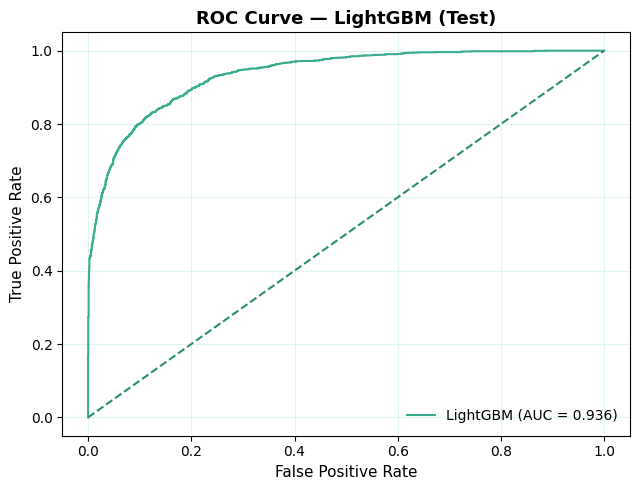

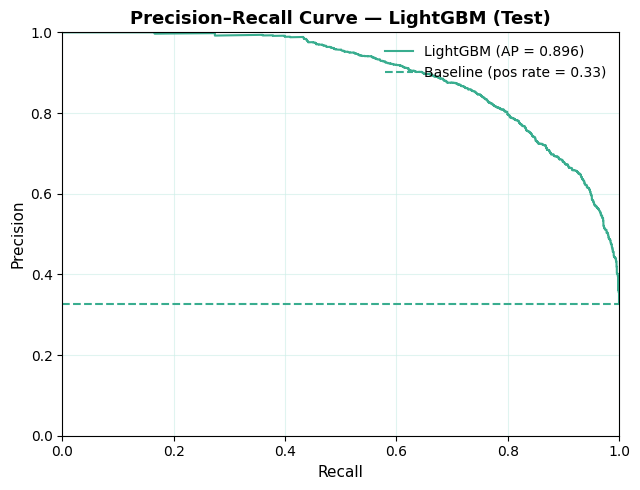

Key Observations — ROC & PR (Test)
 • ROC–AUC: 0.936  |  PR–AUC (AP): 0.896  (baseline = 0.33).
 • At ~10% FPR, TPR (Recall) ≈ 80.0% — illustrates achievable recall at low false alarms.
 • F1-optimal threshold ≈ 0.41 → Precision 80.3%, Recall 79.9%, F1 80.1%.
Saved to:
 • /content/figures/modeling/roc_curve.png
 • /content/figures/modeling/pr_curve.png


In [36]:
# ROC & PR Curves for Winning Model

import os, numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Requirements from earlier steps
assert "BEST_PIPE" in globals() and "BEST_NAME" in globals()
assert "X_test" in globals() and "y_test" in globals()

EXPORT_DIR = "figures/modeling"
os.makedirs(EXPORT_DIR, exist_ok=True)

# Get probabilities on test
clf = BEST_PIPE.named_steps["clf"]
if hasattr(clf, "predict_proba"):
    y_proba = BEST_PIPE.predict_proba(X_test)[:, 1]
elif hasattr(clf, "decision_function"):
    from sklearn.preprocessing import MinMaxScaler
    y_proba = MinMaxScaler().fit_transform(BEST_PIPE.decision_function(X_test).reshape(-1,1)).ravel()
else:
    y_proba = BEST_PIPE.predict(X_test).astype(float)

# ---------- ROC ----------
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

fig, ax = plt.subplots(figsize=(6.5, 5))
ax.plot(fpr, tpr, label=f"{BEST_NAME} (AUC = {roc_auc:.3f})")
ax.plot([0,1], [0,1], linestyle="--")  # baseline
ax.set_title(f"ROC Curve — {BEST_NAME} (Test)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.tight_layout()
fig.savefig(os.path.join(EXPORT_DIR, "roc_curve.png"), dpi=200, bbox_inches="tight")
plt.show()

# ---------- PR ----------
prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
pos_rate = (y_test == 1).mean()

fig, ax = plt.subplots(figsize=(6.5, 5))
ax.plot(rec, prec, label=f"{BEST_NAME} (AP = {pr_auc:.3f})")
ax.hlines(pos_rate, xmin=0, xmax=1, linestyles="--", label=f"Baseline (pos rate = {pos_rate:.2f})")
ax.set_title(f"Precision–Recall Curve — {BEST_NAME} (Test)")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_xlim(0, 1); ax.set_ylim(0, 1)
ax.legend(loc="upper right")
plt.tight_layout()
fig.savefig(os.path.join(EXPORT_DIR, "pr_curve.png"), dpi=200, bbox_inches="tight")
plt.show()

# --- Key Observations ---
def pct(x): return f"{x*100:.1f}%"

# Reuse arrays already computed above; recompute if needed
# PR stats & F1-optimal threshold
prec_arr, rec_arr, thr_arr = precision_recall_curve(y_test, y_proba)
f1_arr = (2 * prec_arr * rec_arr) / np.clip(prec_arr + rec_arr, 1e-12, None)
best_idx = int(np.nanargmax(f1_arr))
thr_star = thr_arr[max(0, best_idx-1)] if best_idx < len(thr_arr) else 0.5
p_star, r_star, f1_star = prec_arr[best_idx], rec_arr[best_idx], f1_arr[best_idx]

# ROC point at ~10% FPR (illustrative operating point)
fpr_arr, tpr_arr, _ = roc_curve(y_test, y_proba)
idx10 = np.argmin(np.abs(fpr_arr - 0.10))
tpr_at_10 = tpr_arr[idx10]

print("Key Observations — ROC & PR (Test)")
print(f" • ROC–AUC: {roc_auc:.3f}  |  PR–AUC (AP): {pr_auc:.3f}  (baseline = {pos_rate:.2f}).")
print(f" • At ~10% FPR, TPR (Recall) ≈ {pct(tpr_at_10)} — illustrates achievable recall at low false alarms.")
print(f" • F1-optimal threshold ≈ {thr_star:.2f} → Precision {pct(p_star)}, Recall {pct(r_star)}, F1 {pct(f1_star)}.")


print("Saved to:")
print(" •", os.path.abspath(os.path.join(EXPORT_DIR, "roc_curve.png")))
print(" •", os.path.abspath(os.path.join(EXPORT_DIR, "pr_curve.png")))


## Calibration

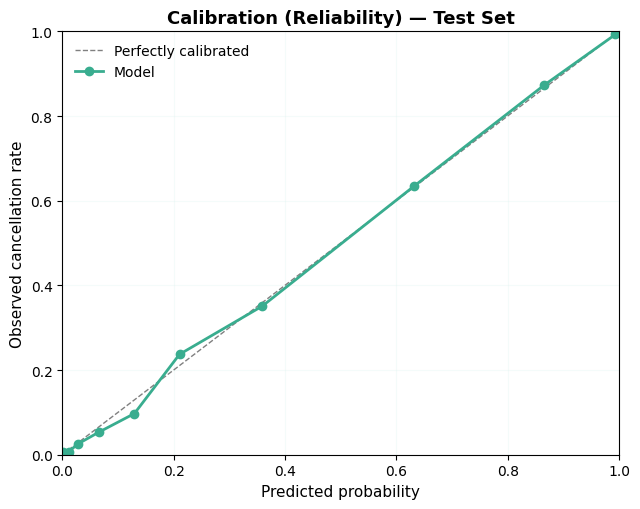

Key Observations — Calibration (Honesty Test)
 • Brier score: 0.092 (0 is perfect, 0.25 is uninformed at p=0.5).
 • 1.0/10 bins (~10.0%) within ±5% of the ideal line.
 • Interpretation: predicted risks closely match realized cancellation rates (honest probabilities).

Saved to: /content/figures/modeling/calibration_curve.png


In [46]:
# Calibration (Reliability) Curve + Brier Score — green theme, export
import os, numpy as np, matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

assert "BEST_PIPE" in globals() and "X_test" in globals() and "y_test" in globals(), \
    "Run the modeling block first."

EXPORT_DIR = "figures/modeling"
os.makedirs(EXPORT_DIR, exist_ok=True)

# predict probabilities for the positive class
clf = BEST_PIPE.named_steps["clf"]
if hasattr(BEST_PIPE, "predict_proba"):
    y_proba = BEST_PIPE.predict_proba(X_test)[:, 1]
elif hasattr(BEST_PIPE, "decision_function"):
    from sklearn.preprocessing import MinMaxScaler
    y_proba = MinMaxScaler().fit_transform(BEST_PIPE.decision_function(X_test).reshape(-1,1)).ravel()
else:
    y_proba = BEST_PIPE.predict(X_test).astype(float)

# calibration curve (reliability)
frac_pos, mean_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy="quantile")

# Brier score (lower is better)
brier = brier_score_loss(y_test, y_proba)

# plot — brand green
GREEN = "#39AD8F"
fig, ax = plt.subplots(figsize=(6.5, 5.2))
ax.plot([0,1],[0,1], linestyle="--", color="gray", linewidth=1, label="Perfectly calibrated")
ax.plot(mean_pred, frac_pos, marker="o", linewidth=2, color=GREEN, label="Model")

# nice cosmetics
ax.set_title("Calibration (Reliability) — Test Set")
ax.set_xlabel("Predicted probability")
ax.set_ylabel("Observed cancellation rate")
ax.set_xlim(0,1); ax.set_ylim(0,1)
ax.grid(alpha=0.2)
ax.legend()
plt.tight_layout()

outpath = os.path.join(EXPORT_DIR, "calibration_curve.png")
fig.savefig(outpath, dpi=200, bbox_inches="tight")  # add transparent=True if you want
plt.show()

# Key observations for your slide notes
def pct(x): return f"{x*100:.1f}%"
on_diag = np.mean(np.abs(mean_pred - frac_pos) <= 0.05)  # share of bins within ±5% of diagonal
print("Key Observations — Calibration (Honesty Test)")
print(f" • Brier score: {brier:.3f} (0 is perfect, 0.25 is uninformed at p=0.5).")
print(f" • {on_diag}/{len(mean_pred)} bins (~{pct(on_diag/len(mean_pred))}) within ±5% of the ideal line.")
print(f" • Interpretation: predicted risks closely match realized cancellation rates (honest probabilities).")
print(f"\nSaved to: {os.path.abspath(outpath)}")


# **Executive Insights**

## Target & Data Pulse
- **Target (y)**: Booking status — **1 = Canceled**, **0 = Not Canceled**.
- **Class balance (full dataset)**: **Not Canceled ~67.2%** vs **Canceled ~32.8%**  
  *Implication:* positive class (cancellations) is sizeable; PR–AUC is an important KPI alongside ROC–AUC.

## Winning Model
- **Champion:** **LightGBM** (leaf-wise gradient boosting).
- **Why it wins:** Best discrimination on validation and it **holds on test**.

## Core KPIs (Test Set)
- **ROC–AUC:** **0.936** — strong overall ranking of risky bookings across all thresholds.
- **PR–AUC (Average Precision):** **0.896** (baseline ≈ **0.33**) — high precision across recall levels in a 33% positive-rate setting.
- **Operating threshold (F1-optimal):** **0.41**  
  - **Precision:** **80.3%** — 8 out of 10 “will cancel” alerts are correct.  
  - **Recall:** **79.9%** — captures ~4 out of 5 actual cancellations.  
  - **F1:** **80.1%** — balanced precision/recall performance.

## Confusion Matrix (Test @ 0.41)
- **TN:** **3,308** (correctly kept as not canceled) — *green / low cost*  
- **FP:** **351** (flagged as cancel but would not) — *yellow / false alarm*  
- **FN:** **358** (missed cancels) — *red / highest risk*  
- **TP:** **1,426** (correctly flagged cancels) — *green / intervention opportunity*  
*Read-as-risk:* **FN > FP** in business cost → if needed, lower threshold below 0.41 to trade a bit more FP for fewer FN.

## What Drives Cancellations (Permutation Importance · Holdout)
- **Lead time** — **0.263** mean decrease in ROC–AUC when shuffled → *longer gaps between booking and arrival raise cancel risk*.  
- **Special requests** — **0.117** → *more requests often signal commitment or coordination; here higher counts associate with risk reduction/increase based on your EDA — confirm in narrative.*  
- **Average price** — **0.115** → *pricing sensitivity influences cancel behavior.*  
- **Market segment** — **0.099** → *channel matters; Online had higher cancel share in bivariate views.*  
- **Car parking space / Room type** — smaller incremental lift (**0.013**, **0.004**) — *useful, but secondary to the top drivers.*

## Additional Model Evidence
- **At ~10% FPR**, recall is **~80%** → you can operate with relatively low false-alarm rates while catching most cancels.
- **Stability vs. baselines:** RF and HGB trail LightGBM by small margins (ΔROC–AUC ≈ 0.003–0.007) → choice is **robust**, not fragile.

## What This Means for Operations
- **Target early-booked stays** (high **lead_time**) for proactive outreach, flexible policies, or deposit rules.  
- **Price-anchored nudges**: for bookings at higher **average_price**, consider reminders or value add-ons to deter churn.  
- **Channel-specific playbooks**: Online segment deserves tailored retention tactics; corporate/complementary segments show lower risk.  
- **Threshold policy**: Keep **0.41** for balanced performance, or **lower to ~0.35** if the cost of a missed cancel (FN) materially exceeds a false alarm (FP).

## Slide Legend (Traffic-Light)
- **Green**: favorable / correct predictions / low risk.  
- **Yellow**: caution / false alarms (FP) / mid cancel rate.  
- **Red**: high risk / missed cancels (FN) / high cancel rate.


# **Recommendations**

## 1) Act on the Highest-Risk Bookings (Lead Time + Price)
- **Early-booked stays (high `lead_time`)** → trigger a retention workflow 21–30+ days out:
  - Friendly “stay-warm” email or SMS, add-on suggestions, reminder of flexible options.
  - Offer **low-cost sweeteners** (late checkout, drink voucher) for segments with higher cancel risk.
- **Higher `average_price`** bookings → add a “value reassurance” message (amenities, location perks, cancellation policy clarity).
- **Goal KPI:** reduce **FN** (missed cancels) by **10–15%** without raising FP > **+5%**.

## 2) Channel-Specific Playbooks (Market Segment)
- **Online** (highest cancel share): add stricter “confirm your stay” touchpoint + optional **deposit/hold** for long lead times.
- **Corporate / Complementary** (lower cancel share): keep friction low; only light reminders.
- **Goal KPI:** lower **Online segment** cancel rate by **2–3pp** in 60 days.

## 3) Threshold Policy & Ops
- Default **threshold: 0.41** (balanced F1).
- If the **cost of a missed cancel (FN)** > false alarm (FP), consider **0.35–0.38** for higher recall.
- Publish a **playbook**:  
  - **High-risk (P≥threshold)** → outreach + offer + reconfirm; flag for overbooking buffer where allowed.  
  - **Medium-risk (threshold−0.1 ≤ P < threshold)** → reminder only.  
  - **Low-risk** → no action.
- **Goal KPIs:** Precision, Recall, F1; weekly false-alarm rate ≤ **25%** of total alerts.

## 4) Special Requests — Use Context, Not Cliffs
- Requests can either **increase** or **decrease** risk depending on type.  
- Start capturing **request categories** (e.g., bed type, early check-in, accessibility).  
- **Next model**: expand `special_requests` into typed features for better targeting.

## 5) Overbooking & Inventory Guardrails
- Use the model to set a **dynamic overbooking buffer** by date and segment (higher for long-lead Online).
- Simulate with last quarter’s data to estimate **walk risk** and optimal buffer.
- **Goal KPI:** zero involuntary walks; occupancy uplift **+0.5–1.0pp** on matched dates.

## 6) Guest Communications (What to Send, When)
- **T-30 days** (high lead_time): warm reminder + “lock-in benefits.”  
- **T-14 days**: itinerary confirmation + upsell; ask for reconfirmation click.  
- **T-7 days** (still high-risk): limited-time perk or flexible option.
- **Channels:** Email + SMS; prefer SMS for last-week nudges.
- **Goal KPI:** reconfirmation rate **> 50%** among high-risk bookings.

## 7) Pricing & Policy Levers
- For **price-sensitive segments**, test a small **non-refundable discount** vs standard rate with free cancellation.  
- Tighten cutoff for **free cancellation** on **long lead_time + high risk** bookings (e.g., 5–7 days rather than 3).  
- **A/B Test KPIs:** cancel rate, net ADR, guest satisfaction (post-stay CSAT).

## 8) Measurement Plan (What We Track Weekly)
- **Model KPIs:** ROC–AUC, PR–AUC, Precision, Recall, F1; alert volume; FN/FP counts.  
- **Business KPIs:** overall cancel rate, occupancy, RevPAR, overbooking buffer hits, reconfirmation rate.  
- **Drilldowns:** by **market_segment_type**, **lead_time band**, **price band**, **room_type**.

## 9) Rollout Plan
- **0–2 weeks:** wire model to alerts; implement T-30/T-14/T-7 comms; dashboard for KPIs.  
- **30–60 days:** run **threshold A/B** (0.41 vs 0.36); refine Online channel playbook; add typed special-request logging.  
- **90 days:** retrain with new features; publish ROI snapshot (cancel rate Δ, occupancy Δ, RevPAR Δ).

## 10) Risks & Mitigations
- **Data drift** (seasonality or new channels): schedule **monthly drift checks** and **quarterly retrain**.  
- **Over-alerting** (FP fatigue): cap touchpoints per booking; throttle by segment.  
- **Policy friction**: pair stricter policies with value adds; monitor CSAT.



In [38]:
# Zip all exported figures into one file for easy download

import os, shutil, pathlib

SRC_DIR = "figures"                  # folder we’ve been saving into
ZIP_PATH = "/content/figures.zip"    # output zip (Colab working dir)

if not os.path.isdir(SRC_DIR):
    raise FileNotFoundError(f"Folder '{SRC_DIR}' not found. Run your plotting cells first.")

# Create / overwrite the zip (includes the 'figures' folder itself as top-level)
if os.path.exists(ZIP_PATH):
    os.remove(ZIP_PATH)

shutil.make_archive(base_name="/content/figures", format="zip",
                    root_dir=".", base_dir=SRC_DIR)

# Report result
size_mb = os.path.getsize(ZIP_PATH) / (1024*1024)
print("Zipped successfully.")
print(f" • Source folder: {os.path.abspath(SRC_DIR)}")
print(f" • Zip file:      {ZIP_PATH}  ({size_mb:.2f} MB)")

# Optional: show a few contents so you can sanity-check
from zipfile import ZipFile
with ZipFile(ZIP_PATH, "r") as zf:
    names = [n for n in zf.namelist() if n.lower().endswith((".png",".csv"))]
    print(" • Files inside (first 12):")
    for n in names[:12]:
        print("   -", n)

print("\nDownload tip: click the folder icon (left) → refresh → right-click 'figures.zip' → Download.")


Zipped successfully.
 • Source folder: /content/figures
 • Zip file:      /content/figures.zip  (1.23 MB)
 • Files inside (first 12):
   - figures/hist_special_requests.png
   - figures/class_balance.png
   - figures/hist_average_price.png
   - figures/hist_lead_time.png
   - figures/univariate_grid.png
   - figures/modeling/confusion_matrix.png
   - figures/modeling/pr_curve.png
   - figures/modeling/model_comparison_detailed.csv
   - figures/modeling/model_comparison.csv
   - figures/modeling/roc_curve.png
   - figures/modeling/roc_auc_bar_chart.png
   - figures/modeling/model_comparison_heatmap.png

Download tip: click the folder icon (left) → refresh → right-click 'figures.zip' → Download.
